
##**House Price Prediction** 

**a) Specifying the Data Analytic Question**


> Create a regression model to find the most suitable model for the price prediction of houses in Seattle.



**b) Defining the Metric for Success**


* Successful identification of a model with a high metric (R2) and providing it to the real estate company to predict price of a house in Seattle. 

* Succecful identification of important variables in predicting the house price.


**c) Understanding the context**


> Hass consultant is a real estate company established in 1992 and therefore have over 25 years of experience in the real estate industry. They would like to predict the price of a house in Seattle given certain variables and have hired a data scientist to do that.


**d) Recording the Experimental Design**

* Reading the Data
* Tidying the Dataset
* Exploratory Analysis
* Implementing the Models
* Evaluation
* Recommendation and conclusion




##**Reading and checking the data**

In [ ]:
# Dowloading tidyverse packages and library.
install.packages('tidyverse')
library(tidyverse)

# Installing our ggbiplot visualisation package
library(devtools)
install_github("vqv/ggbiplot")

# Then Loading our ggbiplot library
library(ggbiplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: usethis




vctrs      (0.3.4 -> 0.3.5) [CRAN]
magrittr   (1.5   -> 2.0.1) [CRAN]
rstudioapi (0.12  -> 0.13 ) [CRAN]
rprojroot  (1.3-2 -> 2.0.2) [CRAN]
plyr       (NA    -> 1.8.6) [CRAN]


Installing 5 packages: vctrs, magrittr, rstudioapi, rprojroot, plyr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpMKCky1/remotes3737ed4d61/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: grid



In [ ]:
#Read the dataset 
hass <- read_csv("http://bit.ly/IndependentProjectWeek7Dataset")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




In [ ]:
# Looking at the structure of our data
str(hass)
# The dataset has 21613 rows and 20 columns and they are all numeric.

tibble [21,613 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id           : num [1:21613] 7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ price        : num [1:21613] 221900 538000 180000 604000 510000 ...
 $ bedrooms     : num [1:21613] 3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num [1:21613] 1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : num [1:21613] 1180 2570 770 1960 1680 ...
 $ sqft_lot     : num [1:21613] 5650 7242 10000 5000 8080 ...
 $ floors       : num [1:21613] 1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : num [1:21613] 0 0 0 0 0 0 0 0 0 0 ...
 $ view         : num [1:21613] 0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : num [1:21613] 3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : num [1:21613] 7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : num [1:21613] 1180 2170 770 1050 1680 ...
 $ sqft_basement: num [1:21613] 0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : num [1:21613] 1955 1951 1933 1965 1987 ...
 $ yr_renovated : num [1:21613] 0 1991 0 0 0 ...
 $ zipcode      : num [1:

In [ ]:
#Checking the head and tail of the data 

head(hass)
tail(hass)

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7129300520,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,1230000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2997800021,475000,3,2.50,1310,1294,2,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
263000018,360000,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,400000,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,402101,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
291310100,400000,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
1523300157,325000,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Lists variables in the dataset
names(hass) 

[1] "id"            "price"         "bedrooms"      "bathrooms"    
 [5] "sqft_living"   "sqft_lot"      "floors"        "waterfront"   
 [9] "view"          "condition"     "grade"         "sqft_above"   
[13] "sqft_basement" "yr_built"      "yr_renovated"  "zipcode"      
[17] "lat"           "long"          "sqft_living15" "sqft_lot15"

In [ ]:
#The rows and columns in the data 
cat("The dataset has ", dim(hass)[1], "rows and ", dim(hass)[2], " columns")

The dataset has  21613 rows and  20  columns

In [ ]:
#checking the datatypes on the columns 
sapply(hass, class)

id         price      bedrooms     bathrooms   sqft_living 
    "numeric"     "numeric"     "numeric"     "numeric"     "numeric" 
     sqft_lot        floors    waterfront          view     condition 
    "numeric"     "numeric"     "numeric"     "numeric"     "numeric" 
        grade    sqft_above sqft_basement      yr_built  yr_renovated 
    "numeric"     "numeric"     "numeric"     "numeric"     "numeric" 
      zipcode           lat          long sqft_living15    sqft_lot15 
    "numeric"     "numeric"     "numeric"     "numeric"     "numeric"

The dataset has 21613 rows and 20 columns and they are all numeric.

This is a classic dataset with the following variables:

- Square footage of different part of the house: sqft_living, sqft_lot, sqft_above, sqft_basement

- Houses in the neighborhood (in 2015): sqft_living15, sqft_lot15
- Number of bedrooms, bathrooms and floors
- Waterfront or not
- Location variables: zipcode, lat, long
- Date of sale, year built, and renovated: yr_built, yr_renovated
- Quality: condition, grade, and how many times it was viewed: view
- The target variable is the price at which the house was sold.

## **Tidying the dataset**

In [ ]:
## Importing packages for plotting 
library(tidyr)
library(ggplot2)
library(dplyr)

In [ ]:
# Selecting the numerical data and excluding the ID column.
hass1 <- hass[,-c(1)]
head(hass1)


price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
1230000,4,4.50,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


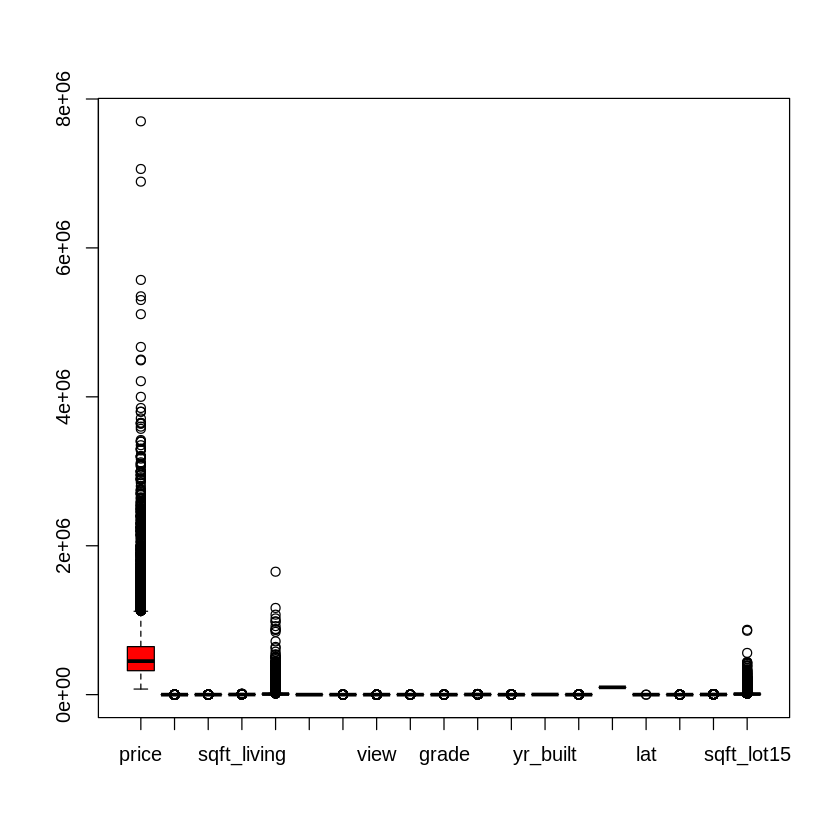

In [ ]:
#Checking for outliers 
boxplot(hass1, col = rainbow(ncol(hass1)))

[1] 1230000.0000 2000000.0000 1350000.0000 1330000.0000 1450000.0000
    [6] 2250000.0000 1510000.0000 2400000.0000 2900000.0000 1370000.0000
   [11] 2050000.0000 3080000.0000 2380000.0000 1380000.0000 1400000.0000
   [16] 1350000.0000 1550000.0000 1300000.0000 1450000.0000 1200000.0000
   [21] 1150000.0000 1390000.0000 1280000.0000 1200000.0000 1490000.0000
   [26] 2250000.0000 1600000.0000 2130000.0000 1450000.0000 1950000.0000
   [31] 1220000.0000 3070000.0000 1250000.0000 1150000.0000 1480000.0000
   [36] 1580000.0000 1300000.0000 1310000.0000 2250000.0000 1360000.0000
   [41] 1220000.0000 2400000.0000 1270000.0000 1200000.0000 1320000.0000
   [46] 2450000.0000 1240000.0000 1570000.0000 1130000.0000 1200000.0000
   [51] 1280000.0000 1960000.0000 1750000.0000 5110000.0000 1150000.0000
   [56] 1880000.0000 1230000.0000 2300000.0000 2260000.0000 5300000.0000
   [61] 1200000.0000 2200000.0000 1130000.0000 1180000.0000 1700000.0000
   [66] 1400000.0000 2540000.0000 1360000.0000 1230000.0000 5350000.0000
   [71] 1330000.0000 1220000.0000 1250000.0000 1300000.0000 1180000.0000
   [76] 1380000.0000 1150000.0000 1200000.0000 2250000.0000 1230000.0000
   [81] 1270000.0000 1680000.0000 1930000.0000 1180000.0000 2350000.0000
   [86] 1140000.0000 1320000.0000 1430000.0000 1530000.0000 1570000.0000
   [91] 1130000.0000 1580000.0000 1250000.0000 1720000.0000 2400000.0000
   [96] 1600000.0000 1480000.0000 2530000.0000 1570000.0000 1200000.0000
  [101] 1250000.0000 3850000.0000 1200000.0000 1640000.0000 1330000.0000
  [106] 1740000.0000 1700000.0000 1650000.0000 1550000.0000 1680000.0000
  [111] 1760000.0000 1340000.0000 2750000.0000 1190000.0000 1400000.0000
  [116] 1810000.0000 1370000.0000 1190000.0000 1540000.0000 1600000.0000
  [121] 3280000.0000 1130000.0000 1600000.0000 1220000.0000 1700000.0000
  [126] 1280000.0000 1870000.0000 1220000.0000 1250000.0000 1600000.0000
  [131] 1620000.0000 1650000.0000 1240000.0000 1170000.0000 1600000.0000
  [136] 4500000.0000 1270000.0000 1380000.0000 1150000.0000 1510000.0000
  [141] 1610000.0000 1290000.0000 1390000.0000 1320000.0000 1400000.0000
  [146] 1840000.0000 3600000.0000 1250000.0000 3000000.0000 1130000.0000
  [151] 1200000.0000 2950000.0000 1330000.0000 2530000.0000 1800000.0000
  [156] 2300000.0000 1130000.0000 2290000.0000 1500000.0000 1130000.0000
  [161] 1320000.0000 1270000.0000 1510000.0000 1900000.0000 1400000.0000
  [166] 1140000.0000 1900000.0000 1210000.0000 1900000.0000 1310000.0000
  [171] 1970000.0000 1680000.0000 2080000.0000 2540000.0000 1570000.0000
  [176] 1280000.0000 1230000.0000 1290000.0000 1230000.0000 1170000.0000
  [181] 1230000.0000 1250000.0000 2100000.0000 1580000.0000 1600000.0000
  [186] 1290000.0000 1440000.0000 1350000.0000 1240000.0000 2450000.0000
  [191] 2450000.0000 1910000.0000 1740000.0000 1650000.0000 2890000.0000
  [196] 1580000.0000 2200000.0000 1330000.0000 2950000.0000 1230000.0000
  [201] 1420000.0000 7060000.0000 1210000.0000 1500000.0000 1300000.0000
  [206] 1380000.0000 1150000.0000 1500000.0000 2400000.0000 1390000.0000
  [211] 1350000.0000 2500000.0000 2150000.0000 1210000.0000 4000000.0000
  [216] 1190000.0000 1600000.0000 2880000.0000 1290000.0000 1880000.0000
  [221] 1570000.0000 1300000.0000 2400000.0000 1280000.0000 1160000.0000
  [226] 1190000.0000 1400000.0000 2130000.0000 1140000.0000 1150000.0000
  [231] 1150000.0000 2050000.0000 1710000.0000 5570000.0000 1150000.0000
  [236] 1340000.0000 1670000.0000 1250000.0000 2000000.0000 1240000.0000
  [241] 1440000.0000 1260000.0000 1200000.0000 1210000.0000 1130000.0000
  [246] 1160000.0000 1410000.0000 2490000.0000 1350000.0000 1130000.0000
  [251] 1200000.0000 1130000.0000 1490000.0000 1470000.0000 1850000.0000
  [256] 2480000.0000 2050000.0000 1150000.0000 1900000.0000 1940000.0000
  [261] 1400000.0000 1580000.0000 1170000.0000 1200000.0000 1390000.0000
  [266] 1300000.0000 1530000.0000 1150000.0000 1310000.0000 1300000.0000
  [271] 1500000.0000 1160000.0000 1320000.0000 1160000.0000 16

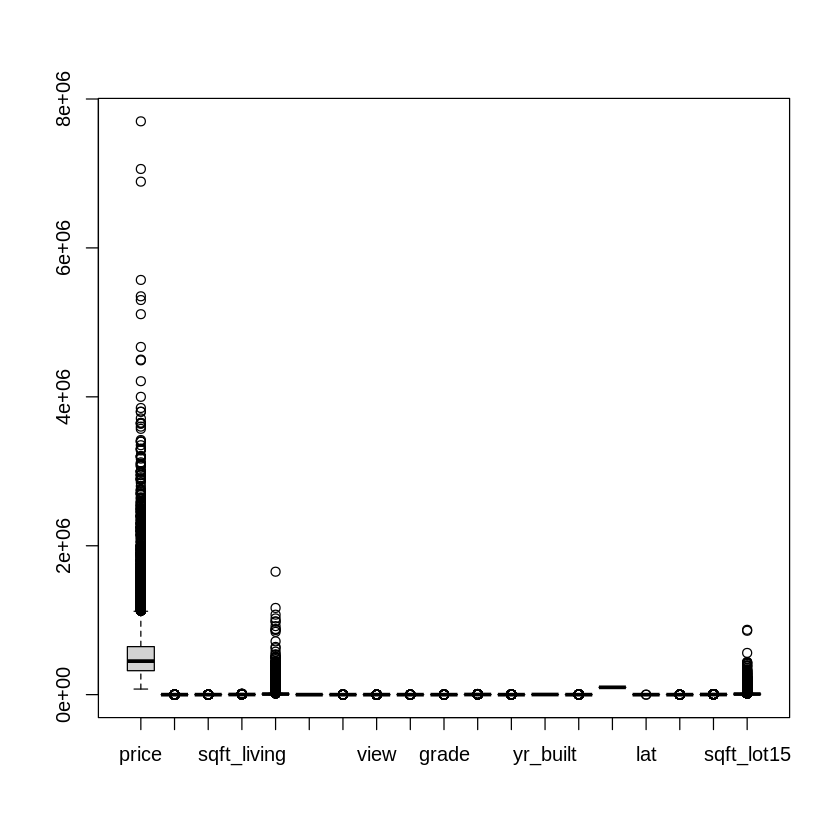

In [ ]:
# Listing the outliers 
OutVals = boxplot(hass1, plot=TRUE)$out
OutVals

In [ ]:
#Removing outliers 
house <- hass1

house<- hass1[-which(hass1$price %in% OutVals),]
#house<- hass1[-which(hass1$sqft_lot %in% OutVals),]
#house<- hass1[-which(hass1$sqft_lot15 %in% OutVals),]
#check the difference 
print(dim(hass1))
print(dim(house))


[1] 21613    19
[1] 20351    19


In [ ]:
house<- hass1[-which(hass1$sqft_lot %in% OutVals),]
#house<- hass1[-which(hass1$sqft_lot15 %in% OutVals),]
#check the difference 
print(dim(hass1))
print(dim(house))

[1] 21613    19
[1] 15641    19


In [ ]:
house<- hass1[-which(hass1$sqft_lot15 %in% OutVals),]
#check the difference 
print(dim(hass1))
print(dim(house))

[1] 21613    19
[1] 15646    19


In [ ]:
house<- house[-which(house$price %in% OutVals),]
house<- house[-which(house$sqft_lot %in% OutVals),]
house<- house[-which(house$sqft_lot15 %in% OutVals),]

print(dim(house))

[1]  0 19


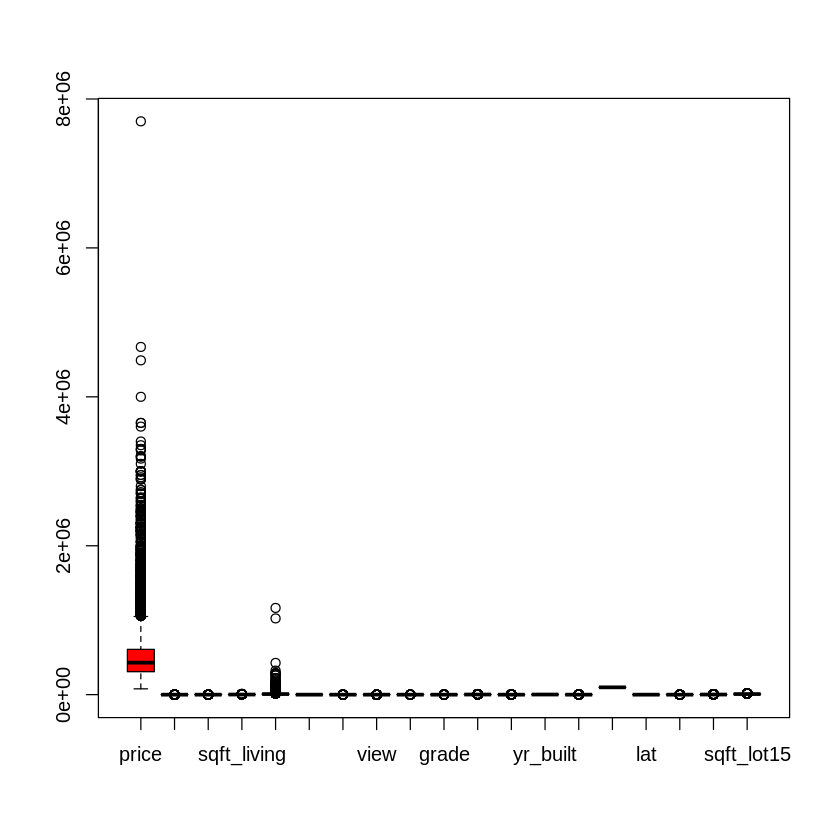

In [ ]:
#Checking for outliers 
boxplot(house, col = rainbow(ncol(house)))

In [ ]:
head(house)

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
291850,3,1.50,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [ ]:
#Duplicates
#checking for duplicates 

table(duplicated(house))
#There are 5 duplicates


FALSE  TRUE 
15641     5 

In [ ]:
#Removing the duplicates
house<- unique(house)

table(duplicated(house))


FALSE 
15641 

In [ ]:
#Exporting the cleaned dataset

write.csv(house,"D:\\MORINGA CORE\\UNSUPERVISED LEARNING\\WEEK 15.csv", row.names = FALSE)

In [ ]:
# Checking the number of missing per column/variable
colSums(is.na(house)) 

price      bedrooms     bathrooms   sqft_living      sqft_lot 
            0             0             0             0             0 
       floors    waterfront          view     condition         grade 
            0             0             0             0             0 
   sqft_above sqft_basement      yr_built  yr_renovated       zipcode 
            0             0             0             0             0 
          lat          long sqft_living15    sqft_lot15 
            0             0             0             0

The dataset has outliers which were removed, there are no missing values recorded and 5 duplicates datapoints which were removed resulting in the cleaned dataset has 15641 items.

The cleaned dataset was exported and used in visualizations.

##**Exploratory Data Analysis** 

**Univariate analysis**

In [ ]:
#Summary of the dataset (min, 1st, median, mean, 3rd, max)
#Basic descriptive statistics and frequencies.

summary(house)   
# The minimum price paid for a house is 78000 and the maximum is 7.7M


     price            bedrooms        bathrooms      sqft_living   
 Min.   :  78000   Min.   : 0.000   Min.   :0.000   Min.   :  380  
 1st Qu.: 308000   1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1420  
 Median : 429900   Median : 3.000   Median :2.250   Median : 1880  
 Mean   : 511544   Mean   : 3.386   Mean   :2.116   Mean   : 2037  
 3rd Qu.: 609000   3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2480  
 Max.   :7700000   Max.   :10.000   Max.   :8.000   Max.   :12050  
    sqft_lot           floors        waterfront            view       
 Min.   :    520   Min.   :1.000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.:   5700   1st Qu.:1.000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median :   7816   Median :1.000   Median :0.000000   Median :0.0000  
 Mean   :   9005   Mean   :1.492   Mean   :0.005498   Mean   :0.2094  
 3rd Qu.:  10027   3rd Qu.:2.000   3rd Qu.:0.000000   3rd Qu.:0.0000  
 Max.   :1164794   Max.   :3.500   Max.   :1.000000   Max.   :4.0000  
   condition        grade  

In [ ]:
#Descriptive statistics for each column 
# install.packages("moments")
# library(moments)
desc_stats <- data.frame(
  Skew = apply(house, 2, skewness),    # skew
  Kurt = apply(house, 2, kurtosis),     # kurt
  variance= apply(house, 2, var),  #Variance 
  SD = apply(house, 2, sd)   # Standard deviation
  ) 

#get the min,max, median, mean , variance and standard deviation of numerical variables 
desc_stats <- round(desc_stats, 1)
print(desc_stats)

#Get the mode 

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

attach(house)
 print("The mode of the price column is " )
getmode(price);

 print("The mode of the floors column is " )
  getmode(floors);

 print("The mode of the bedroom column is " )
 getmode(bedrooms); 

  print("The mode of the view  column is " )
    getmode(view);

  print("The mode of the waterfront  column is " )
  getmode(waterfront);

print("The mode of the living room sqft column is " )
 getmode(sqft_living);

 print("The mode of the lot sqft  column is " )
  getmode(sqft_lot);

  print("The mode of the condition  column is " )
  getmode(condition);

              Skew   Kurt     variance       SD
price          3.6   32.4 1.119766e+11 334629.0
bedrooms       0.5    4.7 8.000000e-01      0.9
bathrooms      0.4    4.0 6.000000e-01      0.7
sqft_living    1.3    6.9 7.379152e+05    859.0
sqft_lot      43.5 2711.2 2.629541e+08  16215.9
floors         0.7    2.6 3.000000e-01      0.6
waterfront    13.4  179.9 0.000000e+00      0.1
view           3.6   15.7 5.000000e-01      0.7
condition      1.1    3.7 4.000000e-01      0.6
grade          0.8    4.2 1.200000e+00      1.1
sqft_above     1.3    5.3 5.942552e+05    770.9
sqft_basement  1.6    5.8 1.881750e+05    433.8
yr_built      -0.5    2.6 7.480000e+02     27.4
yr_renovated   5.1   27.2 1.317916e+05    363.0
zipcode        0.5    2.1 3.080500e+03     55.5
lat           -0.4    2.2 0.000000e+00      0.1
long           0.9    4.3 0.000000e+00      0.1
sqft_living15  1.1    4.4 4.307837e+05    656.3
sqft_lot15     0.2    3.1 1.101048e+07   3318.2


The following objects are masked from house (pos = 3):

    bathrooms, bedrooms, condition, floors, grade, lat, long, price,
    sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot,
    sqft_lot15, view, waterfront, yr_built, yr_renovated, zipcode


The following objects are masked from house (pos = 4):

    bathrooms, bedrooms, condition, floors, grade, lat, long, price,
    sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot,
    sqft_lot15, view, waterfront, yr_built, yr_renovated, zipcode


The following objects are masked from house (pos = 5):

    bathrooms, bedrooms, condition, floors, grade, lat, long, price,
    sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot,
    sqft_lot15, view, waterfront, yr_built, yr_renovated, zipcode


The following objects are masked from house (pos = 6):

    bathrooms, bedrooms, condition, floors, grade, lat, long, price,
    sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot,
    sqft_lot15, view

[1] "The mode of the price column is "


[1] 350000

[1] "The mode of the floors column is "


[1] 1

[1] "The mode of the bedroom column is "


[1] 3

[1] "The mode of the view  column is "


[1] 0

[1] "The mode of the waterfront  column is "


[1] 0

[1] "The mode of the living room sqft column is "


[1] 1300

[1] "The mode of the lot sqft  column is "


[1] 6000

[1] "The mode of the condition  column is "


[1] 3

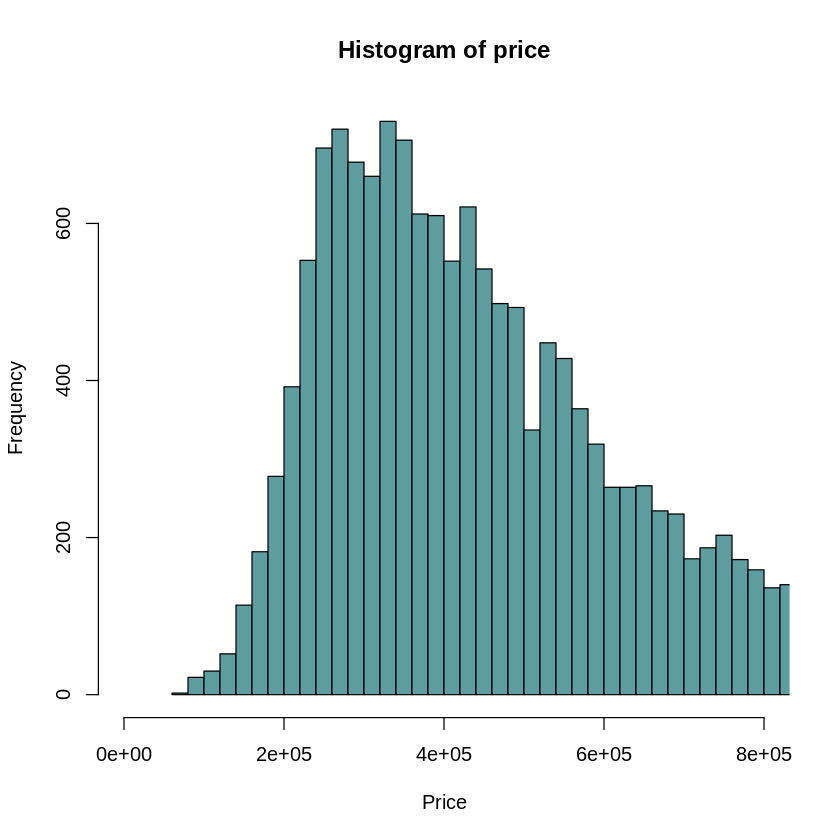

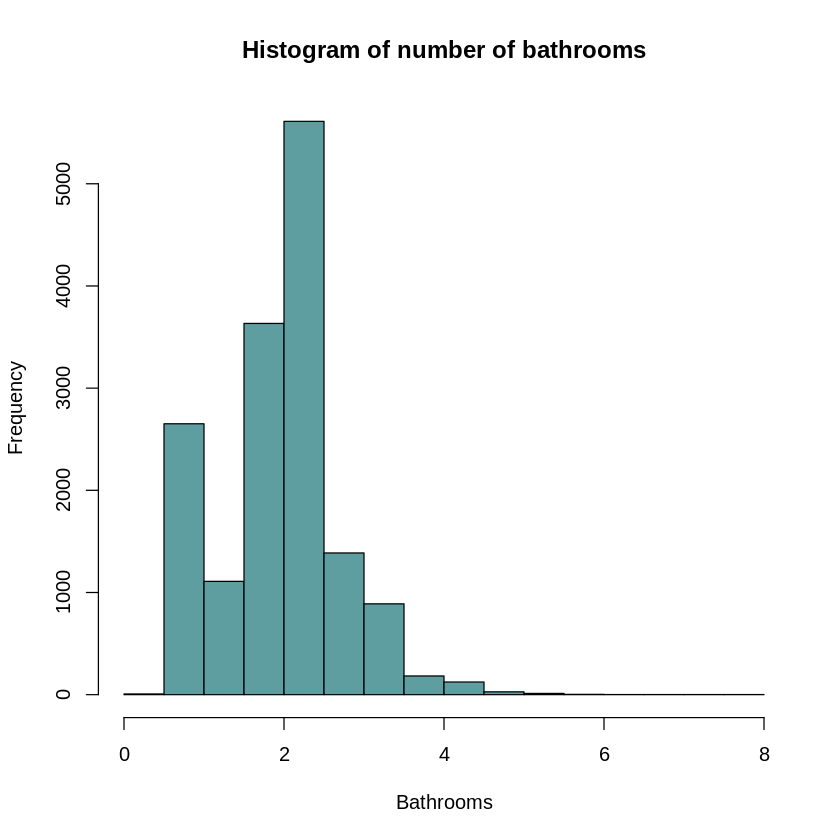

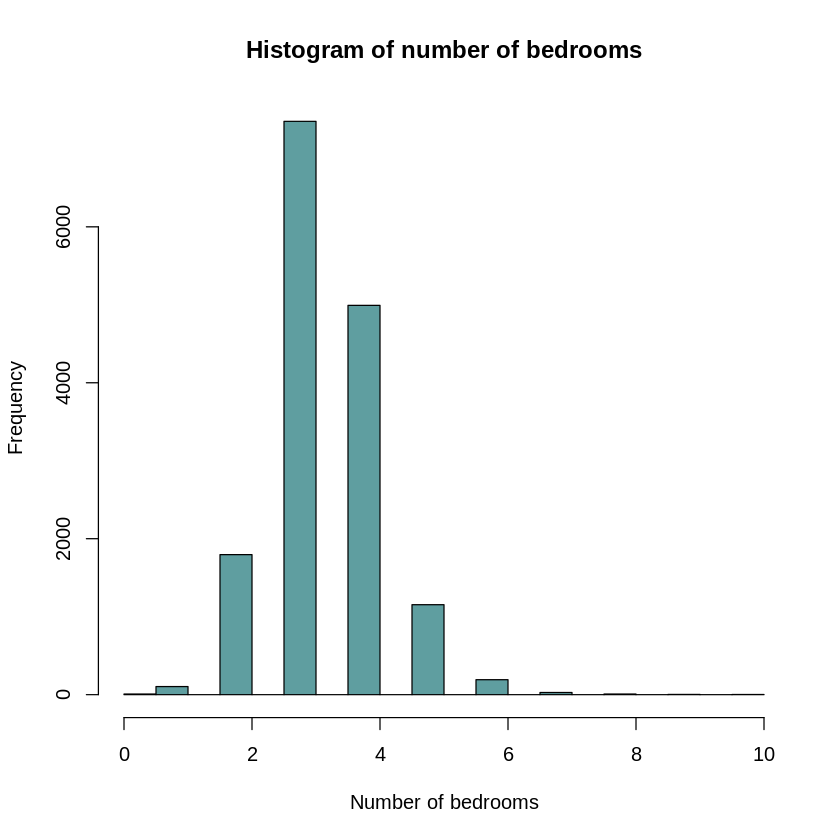

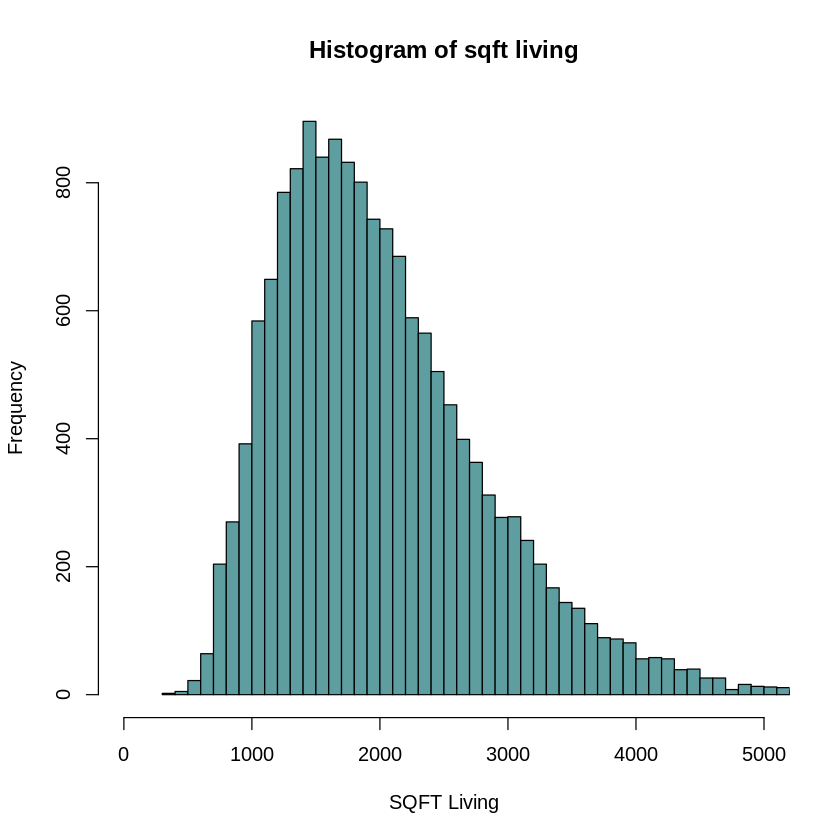

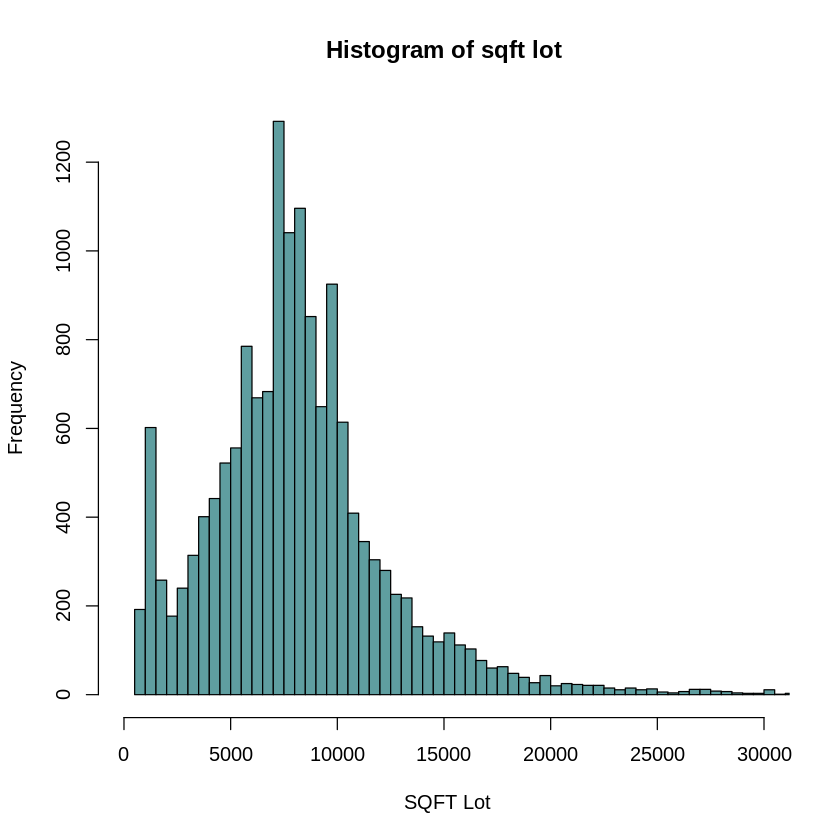

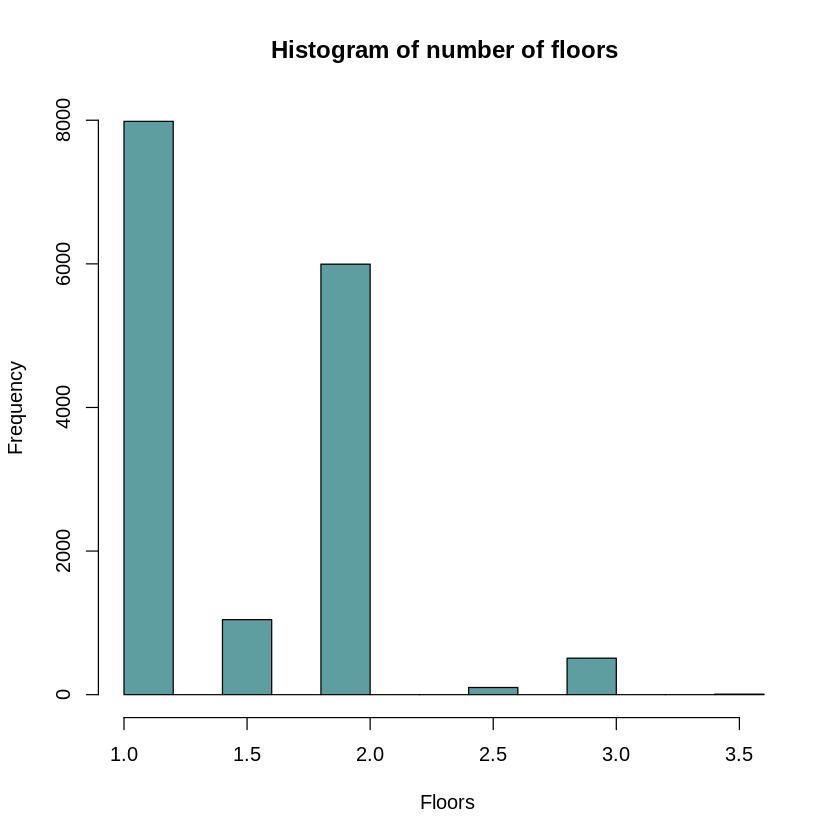

In [ ]:
#See the  distribution of numeric 
knitr::opts_chunk$set(fig.width=12, fig.height=8) 
#par(mfrow=c(3,3))
#par(fig=c(0.1,0.7,0.3,0.9)) #, mfcol = c(3,3))


hist(house$price, col='cadetblue', main = "Histogram of price", xlab= "Price", breaks= "FD", xlim = c(1, 800000))
hist(house$bathrooms, col='cadetblue', main = "Histogram of number of bathrooms", xlab= "Bathrooms")
hist(house$bedrooms, col='cadetblue', main = "Histogram of number of bedrooms", xlab= "Number of bedrooms")
hist(house$sqft_living, col='cadetblue', main = "Histogram of sqft living", xlab= "SQFT Living", breaks= "FD", xlim = c(1, 5000))
hist(house$sqft_lot, col='cadetblue', main = "Histogram of sqft lot", xlab= " SQFT Lot", breaks= "FD", xlim = c(1, 30000))
hist(house$floors, col='cadetblue', main = "Histogram of number of floors", xlab= " Floors")


The minimum price paid for a house is 78000 and the maximum is 7.7M and most houses sold for 350000.

Most houses have 1 floor, 3 bedrooms, no view or waterfront,1300 sqft living space, 6000 sqft lot and a grade condition of 3.

Year built and latitude are moderately skewed to the left indicating a close to normal distribution.

Square foot of lot and waterfront are skewed to the right indicating the data is not normally distributed.

Square foot of lot, view, year renovated and waterfront have a high kurtosis indicating very steep peaks.



**Bivariate analysis**


In [ ]:
# install.packages("tidyverse")
# library(tidyverse)

# install.packages("corrr")
# library(corrr)
corrr_result <- correlate(house)
#> 
#> Correlation method: 'pearson'
#> Missing treated using: 'pairwise.complete.obs'

corrr_result

# look only at the desired comparison
corrr_result %>% 
  filter(rowname == "price") %>% 
  select(-Y)



Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




rowname,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
price,NA,0.313764679,0.52265592,0.70214592,0.05888158,0.247120665,0.2369917532,0.39826525,0.03160476,0.674683426,0.595937616,0.33140642,0.07456389,0.131376455,-0.07119497,0.3203987335,0.04096822,0.597117788,0.15496631
bedrooms,0.31376468,NA,0.51238672,0.60450560,0.05313864,0.128370480,-0.0080169042,0.09247489,0.03234639,0.349309030,0.494238859,0.31877940,0.14287336,0.016337889,-0.16324877,-0.0153898986,0.13976213,0.416241310,0.20787399
bathrooms,0.52265592,0.512386718,NA,0.74040732,0.02060903,0.494185810,0.0536569546,0.18278038,-0.13925558,0.654940095,0.672036108,0.27194128,0.52514017,0.045225901,-0.19845152,0.0334906899,0.21255366,0.573608388,0.01461147
sqft_living,0.70214592,0.604505601,0.74040732,NA,0.10246450,0.320365209,0.0889403577,0.29210277,-0.06186029,0.746913051,0.863782854,0.44525421,0.30933598,0.051985245,-0.18966122,0.0566158229,0.21700646,0.768641440,0.26500607
sqft_lot,0.05888158,0.053138638,0.02060903,0.10246450,NA,-0.090100855,0.0197415223,0.03951996,0.01848656,0.046262062,0.089232215,0.04433413,-0.04921627,0.014967426,-0.07491109,-0.0370708426,0.09348483,0.084371265,0.27818338
floors,0.24712067,0.128370480,0.49418581,0.32036521,-0.09010086,NA,0.0276492615,0.01592489,-0.29086974,0.450333404,0.510280693,-0.27240013,0.54095241,0.001690192,-0.04760668,0.0499457135,0.11502036,0.261153257,-0.35399204
waterfront,0.23699175,-0.008016904,0.05365695,0.08894036,0.01974152,0.027649262,NA,0.37582797,0.01290594,0.071967283,0.056140775,0.07635875,-0.02886514,0.094818051,0.03836512,0.0004790369,-0.01790467,0.073026840,0.08058944
view,0.39826525,0.092474892,0.18278038,0.29210277,0.03951996,0.015924889,0.3758279745,NA,0.05345121,0.257404984,0.154761619,0.30341669,-0.06257020,0.092546032,0.08600069,0.0224316546,-0.07624341,0.297713273,0.14871377
condition,0.03160476,0.032346393,-0.13925558,-0.06186029,0.01848656,-0.290869741,0.0129059406,0.05345121,NA,-0.150185351,-0.159750083,0.16138828,-0.36570723,-0.047000627,-0.02501109,-0.0199314598,-0.08694389,-0.090945530,0.15871076


ERROR: ignored

Using the Pearson correlation, price is very highly correlated with square feet of the living space, moderately highly correlated with bathrooms,  grade, square feet of above and square feet of living space of the next 15 neighbours.

Zipcode is negatively correlated with the price of a house therefore price reduces depending on the zipcode(location)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



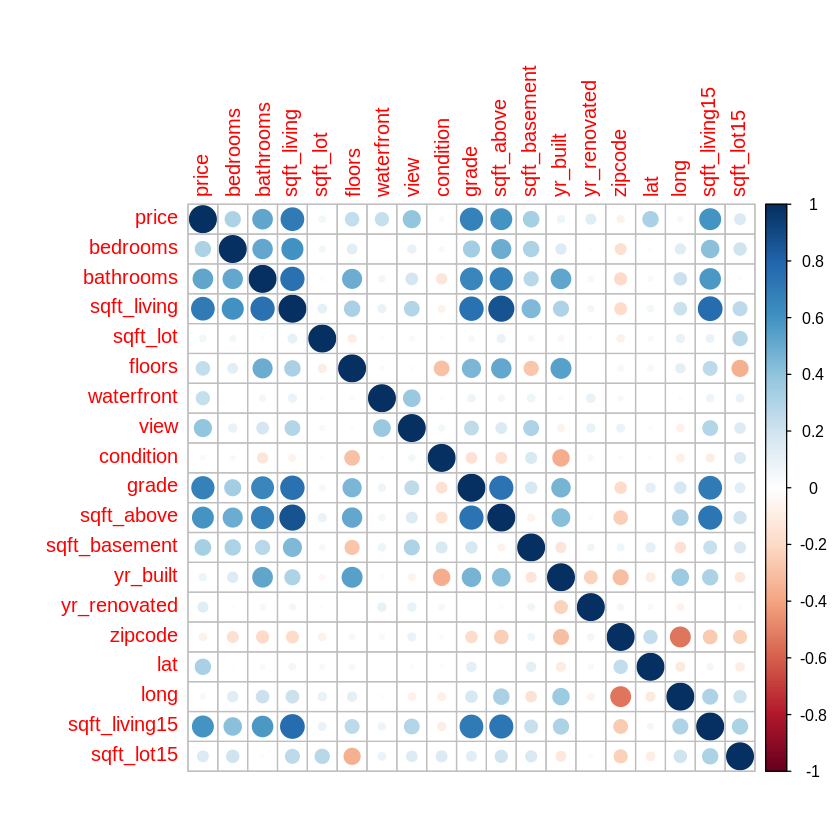

In [ ]:
# Correlation
M<-cor(house) #find the correlation
install.packages("corrplot")
library(corrplot)
# Margins area
par(oma=c(0,0,0,0)) # all sides have 3 lines of space
par(mar=c(0,0,0,0) + 0.1)
fig.dim = c(8, 6)
corrplot(M, method="circle") #Compute and visualize the correlation co-eeficients 

Covariance

In [ ]:
# Assigning the columns to variables
price <- house$price
bedrooms <- house$bedrooms
bathroom <- house$bathrooms
floor <- house$floors



In [ ]:
# Using the cov() function to find the covariance
cov(price, bedrooms)
cov(price, bathroom)
cov(price, floor)

[1] 92533.96

[1] 129791.2

[1] 45645.91

Scatter plots

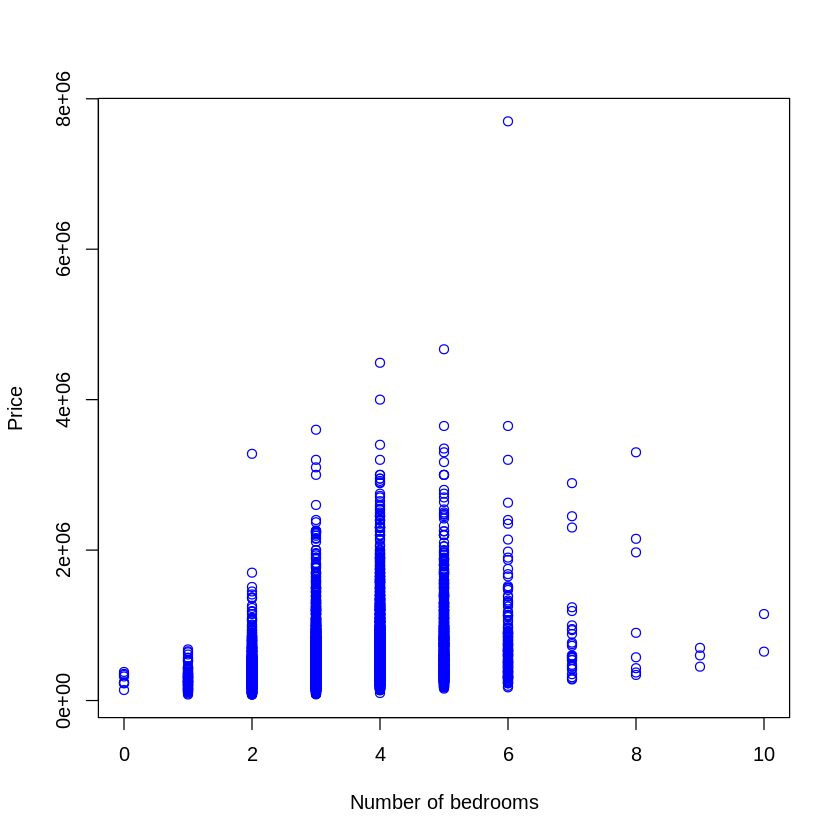

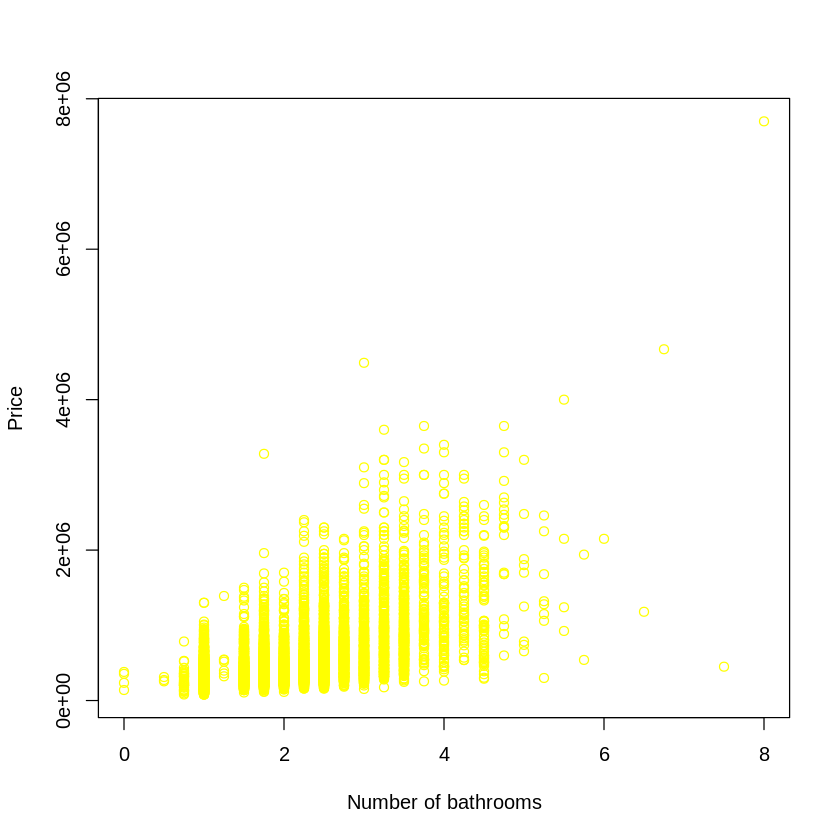

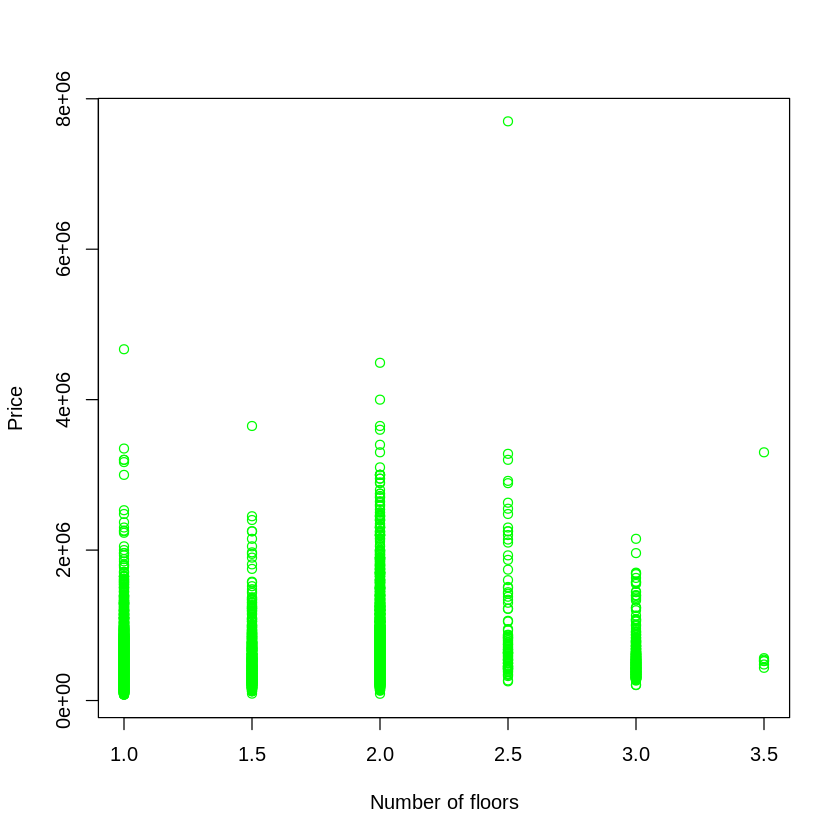

In [ ]:
# Creating the scatter plot of clicks and its relationship to other variables
plot(bedrooms,price, xlab="Number of bedrooms", ylab="Price", col = "blue")
plot(bathroom, price, xlab="Number of bathrooms", ylab="Price", col = "yellow")
plot(floor, price, xlab="Number of floors", ylab="Price", col = "green")

# Most houses have between 3 and 6 bedrooms, 2 and 5 bathrooms and number of floors ranged from 1 to 2.

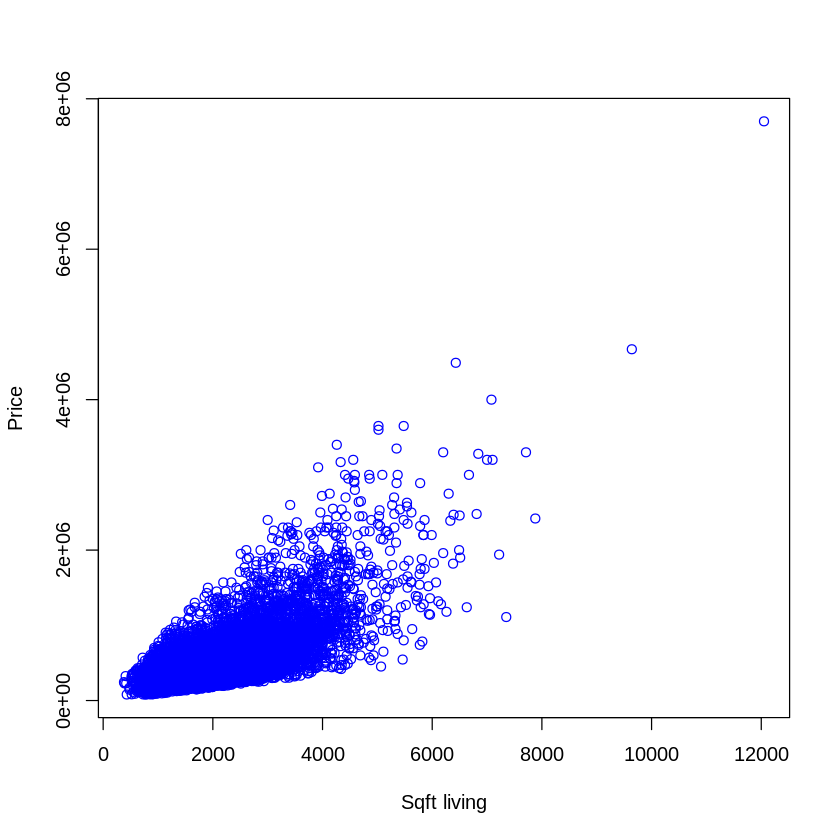

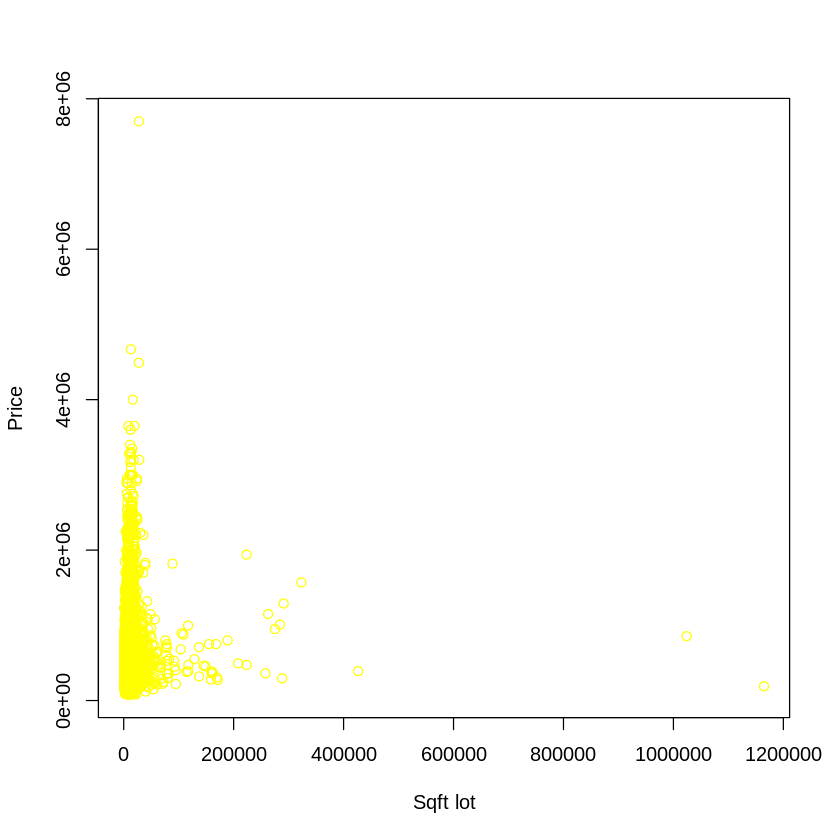

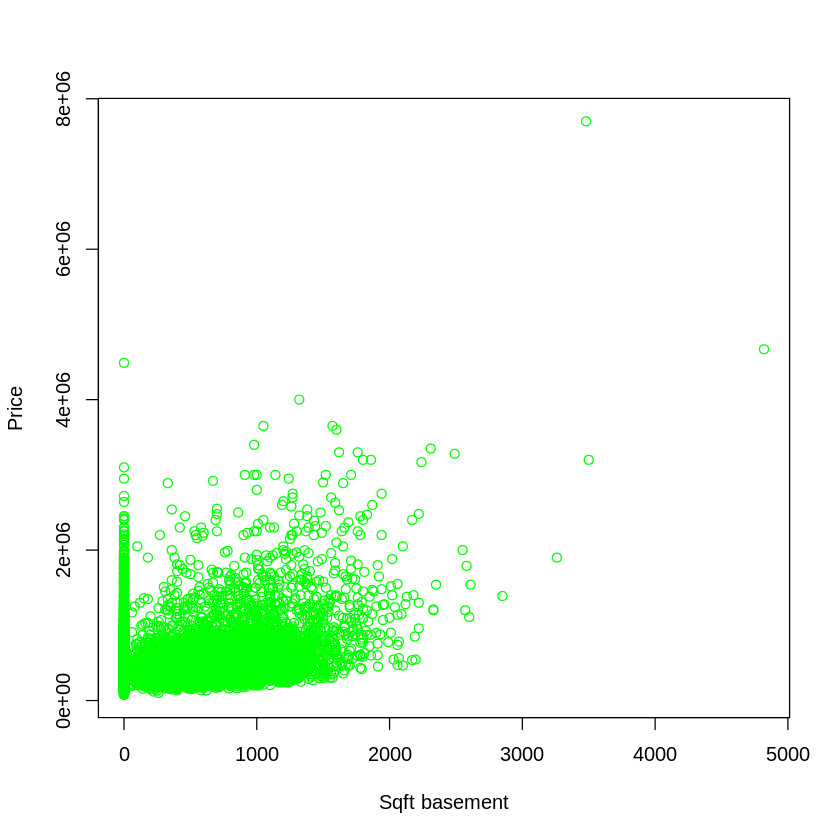

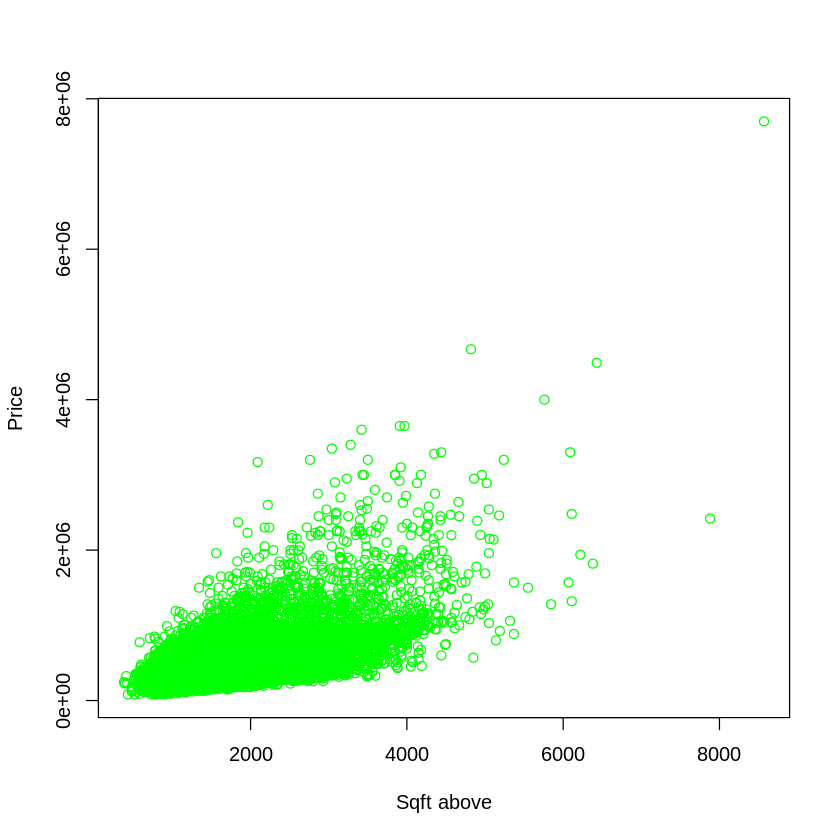

In [ ]:
living <- house$sqft_living
lot <- house$sqft_lot
base <- house$sqft_basement
above <- house$sqft_above

# Creating the scatter plot of clicks and its relationship to other variables
plot(living,price, xlab="Sqft living", ylab="Price", col = "blue")
plot(lot, price, xlab="Sqft lot", ylab="Price", col = "yellow")
plot(base, price, xlab="Sqft basement", ylab="Price", col = "green")
plot(above, price, xlab="Sqft above", ylab="Price", col = "green")

Most houses have between 3 and 6 bedrooms, 2 and 5 bathrooms and number of floors ranged from 1 to 2.

The price of a house is linearly related with the square feet of the living space, basement, floors above and lot.

In [ ]:
# Visualizing using pair plots
# install.packages("GGally")
# library(GGally)

# ggpairs(house)

#**Feature selection**

Feature ranking 

In [ ]:
# We install and load the required package
install.packages("FSelector")
library(FSelector)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘randomForest’, ‘RWeka’, ‘entropy’




In [ ]:
# From the FSelector package, we use the correlation coefficient as a unit of valuation. 
Scores <- (linear.correlation(price~., house))
Scores
order(Scores, decreasing = TRUE)

,attr_importance
,<dbl>
bedrooms,0.31376468
bathrooms,0.52265592
sqft_living,0.70214592
sqft_lot,0.05888158
floors,0.24712067
waterfront,0.23699175
view,0.39826525
condition,0.03160476
grade,0.67468343


[1]  3  9 17 10  2  7 11 15  1  5  6 18 13 12 14  4 16  8

In [ ]:
# We could also set cutoff as a percentage of 0.5 which would indicate 
# that we would want to work with the percentage of the best variables.

Subset2 <-cutoff.k.percent(Scores, 0.5)
as.data.frame(Subset2)

Subset2
<chr>
sqft_living
grade
sqft_living15
sqft_above
bathrooms
view
sqft_basement
lat
bedrooms


In [ ]:
# Instead of using the scores for the correlation coefficient, 
# we can use an entropy - based approach as shown below;

Scores2 <- information.gain(price~., house)

# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)

Subset3 <- cutoff.k(Scores2, 9)
as.data.frame(Subset3)

Subset3
<chr>
zipcode
lat
grade
sqft_living
sqft_living15
sqft_above
bathrooms
long
bedrooms


 The best features to use are sqft living, sqft living 15, grade, bedrooms, bathrooms, sqft above, lat, view, long and zipcode.

#MODELS


##**Multiple linear regression(lm)**


In [ ]:
# Multiple linear regression
model1 <- lm (price~ zipcode + lat + grade+ sqft_living + sqft_living15 + sqft_above + bathrooms + long + bedrooms + view, data = house)


In [ ]:
summary(model1)


Call:
lm(formula = price ~ zipcode + lat + grade + sqft_living + sqft_living15 + 
    sqft_above + bathrooms + long + bedrooms + view, data = house)

Residuals:
    Min      1Q  Median      3Q     Max 
-893536 -101235  -12186   70890 4636964 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.654e+07  2.956e+06  -5.594 2.25e-08 ***
zipcode       -4.636e+02  3.494e+01 -13.268  < 2e-16 ***
lat            6.270e+05  1.173e+04  53.464  < 2e-16 ***
grade          7.474e+04  2.425e+03  30.819  < 2e-16 ***
sqft_living    1.924e+02  4.853e+00  39.635  < 2e-16 ***
sqft_living15  1.206e+01  4.120e+00   2.926  0.00344 ** 
sqft_above     4.946e+00  4.511e+00   1.096  0.27289    
bathrooms     -7.965e+03  3.295e+03  -2.417  0.01564 *  
long          -2.603e+05  1.475e+04 -17.649  < 2e-16 ***
bedrooms      -3.397e+04  2.324e+03 -14.612  < 2e-16 ***
view           8.587e+04  2.402e+03  35.745  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

In [ ]:
summary(model1)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.653745e+07,2.956136e+06,-5.594278,2.252570e-08
zipcode,-4.635870e+02,3.494011e+01,-13.268046,5.834049e-40
lat,6.270163e+05,1.172787e+04,53.463792,0.000000e+00
grade,7.474428e+04,2.425236e+03,30.819380,1.569472e-202
sqft_living,1.923568e+02,4.853152e+00,39.635437,0.000000e+00
sqft_living15,1.205576e+01,4.119784e+00,2.926308,3.435044e-03
sqft_above,4.945869e+00,4.510711e+00,1.096472,2.728890e-01
bathrooms,-7.965249e+03,3.294890e+03,-2.417455,1.564084e-02
long,-2.603359e+05,1.475059e+04,-17.649182,4.822913e-69
bedrooms,-3.396507e+04,2.324490e+03,-14.611833,4.895489e-48


In [ ]:
confint(model1, level =  0.95)

,2.5 %,97.5 %
(Intercept),-2.233181e+07,-1.074308e+07
zipcode,-5.320737e+02,-3.951004e+02
lat,6.040284e+05,6.500043e+05
grade,6.999054e+04,7.949803e+04
sqft_living,1.828441e+02,2.018696e+02
sqft_living15,3.980505e+00,2.013101e+01
sqft_above,-3.895646e+00,1.378739e+01
bathrooms,-1.442362e+04,-1.506882e+03
long,-2.892488e+05,-2.314231e+05
bedrooms,-3.852134e+04,-2.940880e+04


The most significant features in the linear model are view, bedrooms, grade, latitude, zipcode and square feet of living.(The lower the pvaue the more significant the feature is in predicting the price)

 The multiple R2 is 0.6582 therefore around 65% of the data fits into the regression model.

In [ ]:
sigma(model1)/mean(house$price)

[1] 0.3825883

In [ ]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
zipcode,1,8.876926e+12,8.876926e+12,231.75731,5.817770e-52
lat,1,2.119955e+14,2.119955e+14,5534.74308,0.000000e+00
grade,1,6.795413e+14,6.795413e+14,17741.35240,0.000000e+00
sqft_living,1,1.681571e+14,1.681571e+14,4390.21876,0.000000e+00
sqft_living15,1,1.445536e+12,1.445536e+12,37.73983,8.279565e-10
sqft_above,1,4.854220e+12,4.854220e+12,126.73319,2.754792e-29
bathrooms,1,2.036271e+12,2.036271e+12,53.16263,3.217519e-13
long,1,1.450336e+13,1.450336e+13,378.65130,2.365661e-83
bedrooms,1,1.229441e+13,1.229441e+13,320.98054,4.547400e-71


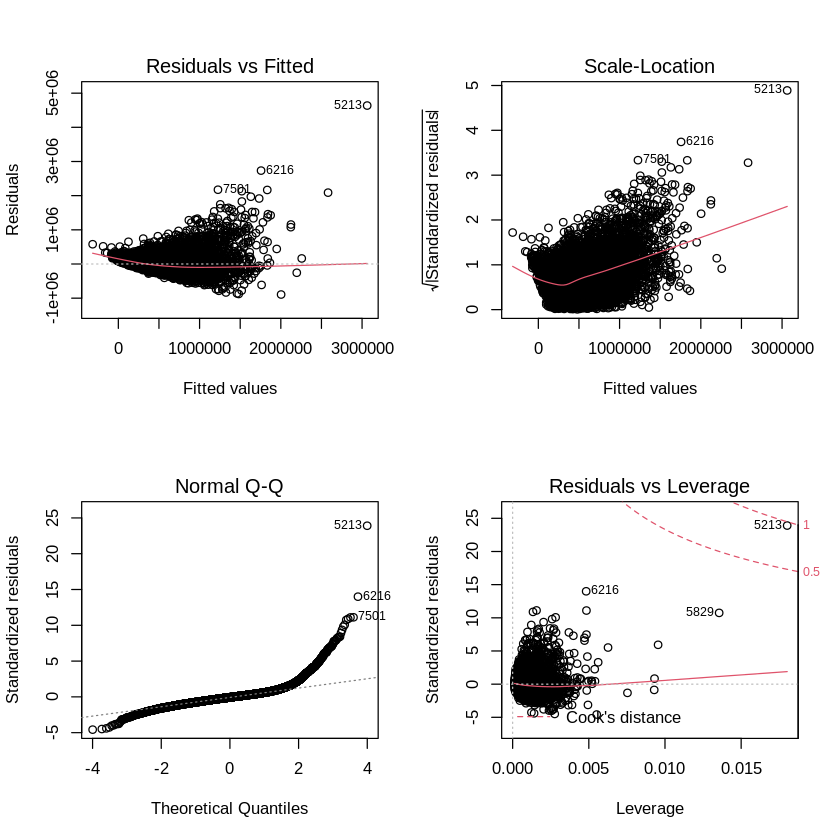

In [ ]:
# diagnostic plots
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(model1)
#Diagnostic plots provide checks for heteroscedasticity, normality, and influential observerations.

In [ ]:
fitted(model1)

1           2           3           4           5           6 
 229018.776  667813.078  329417.000  459229.559  308452.671  147157.297 
          7           8           9          10          11          12 
 385445.811  286342.680  869709.818  407861.733  499265.824  317558.013 
         13          14          15          16          17          18 
 500429.371  206064.405  225071.616  351006.862  181765.661  515141.837 
         19          20          21          22          23          24 
 189164.420  684012.956  468410.648  445374.678  690753.261  444032.976 
         25          26          27          28          29          30 
 336259.303  662437.983  267032.403  178229.598  605759.709  673574.711 
         31          32          33          34          35          36 
 904728.861  445642.609  167193.218  850063.626   88683.478  687276.035 
         37          38          39          40          41          42 
 206465.690  640633.197  586770.848  677057.102 1079596.193  420999.535 
         43          44          45          46          47          48 
 225664.661  561286.446  520964.419  836004.990  376198.069  120816.209 
         49          50          51          52          53          54 
 427983.474  657724.964  405518.277  434820.952  434591.560  235917.529 
         55          56          57          58          59          60 
 412757.595  286942.560  330187.929  725872.307  389641.611  293362.752 
         61          62          63          64          65          66 
 311574.166  959852.144  210781.461  713849.056  358464.505  541970.216 
         67          68          69          70          71          72 
 756339.479  228969.398  507953.645  493049.794  268949.122  438514.542 
         73          74          75          76          77          78 
 522108.962  327799.742  207371.756  966898.613  533664.109  118439.100 
         79          80          81          82          83          84 
 203196.514  910240.543  472343.506  286258.827  855221.221  716020.607 
         85          86          87          88          89          90 
 655903.907  440426.509  325708.196  461101.180  483771.110  683088.931 
         91          92          93          94          95          96 
 333772.348  767850.773  346062.570  458099.996  377640.944  642483.821 
         97          98          99         100         101         102 
 312964.817  380143.931  517207.331  443198.082  501225.513  223855.504 
        103         104         105         106         107         108 
1698362.471  222063.510  890698.946  523644.102   51277.483  377048.969 
        109         110         111         112         113         114 
 336091.899  518936.338  947412.894  556409.728  478676.251   86075.421 
        115         116         117         118         119         120 
 776344.820  450949.322  300086.974  460139.710  626291.862  383591.307 
        121         122         123         124         125         126 
 361458.368  456685.517  265270.767  485409.570  612234.500  158749.784 
        127         128         129         130         131         132 
 857539.876 1264107.343  310704.975  502912.129  635331.279  500318.997 
        133         134         135         136         137         138 
 160447.294  576104.462  615171.779  378512.397  356030.331  412519.489 
        139         140         141         142         143         144 
 565762.621  127017.166  405473.945  218234.782  110741.680  678858.449 
        145         146         147         148         149         150 
 701557.015  128959.263  497194.240  248004.262  445473.003  606338.851 
        151         152         153         154         155         156 
 424299.987  121823.808  550600.444 1200369.284  527344.332  772941.231 
        157         158         159         160         161         162 
 268973.052  720048.090  479045.795  316469.058  277873.529  516061.910 
        163         164         165         166         167         

The RSE estimate gives a measure of error of prediction. The lower the RSE, the more accurate the model (on the data in hand).

In [ ]:
# K-fold cross-validation
# install.packages("DAAG")
# library(DAAG)
cv.lm(df=house, model1, m=3) # 3 fold cross-validation

ERROR: ignored

In [ ]:
# Stepwise Regression
# library(MASS)
# fit <- lm(y~x1+x2+x3,data=mydata)
step <- stepAIC(model1, direction="both")
step$anova # display results

Start:  AIC=381163.2
price ~ zipcode + lat + grade + sqft_living + sqft_living15 + 
    sqft_above + bathrooms + long + bedrooms + view

                Df  Sum of Sq        RSS    AIC
- sqft_above     1 4.6049e+10 5.9872e+14 381162
<none>                        5.9867e+14 381163
- bathrooms      1 2.2384e+11 5.9889e+14 381167
- sqft_living15  1 3.2800e+11 5.9900e+14 381170
- zipcode        1 6.7428e+12 6.0541e+14 381336
- bedrooms       1 8.1778e+12 6.0685e+14 381373
- long           1 1.1931e+13 6.1060e+14 381470
- grade          1 3.6381e+13 6.3505e+14 382084
- view           1 4.8938e+13 6.4761e+14 382390
- sqft_living    1 6.0172e+13 6.5884e+14 382659
- lat            1 1.0948e+14 7.0815e+14 383788

Step:  AIC=381162.4
price ~ zipcode + lat + grade + sqft_living + sqft_living15 + 
    bathrooms + long + bedrooms + view

                Df  Sum of Sq        RSS    AIC
<none>                        5.9872e+14 381162
+ sqft_above     1 4.6049e+10 5.9867e+14 381163
- bathrooms      1 

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,15630,5.986709e+14,381163.2
- sqft_above,1,46049449170,15631,5.987169e+14,381162.4


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘survey’, ‘mitools’, ‘corpcor’


Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma


Loading required package: survey

Loading required package: Matrix


Attaching package: ‘Matrix’


The following object is masked from ‘package:reshape’:

    expand


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml


The following object is masked from ‘package:DAAG’:

    lung


The following object is masked from ‘package:caret’:

    cluster



Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


Loading required package: mitools

This is the global version of package relaimpo.


If you 

Response variable: price 
Total response variance: 111976597808 
Analysis based on 15641 observations 

10 Regressors: 
zipcode lat grade sqft_living sqft_living15 sqft_above bathrooms long bedrooms view 
Proportion of variance explained by model: 65.82%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                      lmg         last        first        pratt
zipcode       0.005151565 0.0238748059 0.0022042401  0.008317613
lat           0.115135926 0.3876550381 0.0446418228  0.128463926
grade         0.191656528 0.1288171521 0.1979522404  0.255579907
sqft_living   0.228869658 0.2130557280 0.2143952172  0.526797497
sqft_living15 0.118564477 0.0011613580 0.1550530652  0.021453080
sqft_above    0.121416271 0.0001630502 0.1544407624  0.010316573
bathrooms     0.082020714 0.0007925792 0.1187933393 -0.014027702
long          0.012942385 0.0422449781 0.0007298852 -0.006426235
bedrooms      0.031377815 0.0289557835 0.0428122885 -0.042645726
view       

Warning message in rev(variances[[p]]) - variances[[p + 1]]:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”
Warning message in rev(variances[[p]]) - variances[[p + 1]]:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”
Warning message in rev(variances[[p]]) - variances[[p + 1]]:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”
Warning message in rev(variances[[p]]) - variances[[p + 1]]:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”
Warning message in rev(variances[[p]]) - variances[[p + 1]]:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”
Warning message in rev(variances[[p]]) - variances[[p + 1]]:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() ins

Response variable: price 
Total response variance: 111976597808 
Analysis based on 15641 observations 

10 Regressors: 
zipcode lat grade sqft_living sqft_living15 sqft_above bathrooms long bedrooms view 
Proportion of variance explained by model: 65.82%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                      lmg         last        first        pratt
zipcode       0.005151565 0.0238748059 0.0022042401  0.008317613
lat           0.115135926 0.3876550381 0.0446418228  0.128463926
grade         0.191656528 0.1288171521 0.1979522404  0.255579907
sqft_living   0.228869658 0.2130557280 0.2143952172  0.526797497
sqft_living15 0.118564477 0.0011613580 0.1550530652  0.021453080
sqft_above    0.121416271 0.0001630502 0.1544407624  0.010316573
bathrooms     0.082020714 0.0007925792 0.1187933393 -0.014027702
long          0.012942385 0.0422449781 0.0007298852 -0.006426235
bedrooms      0.031377815 0.0289557835 0.0428122885 -0.042645726
view       

Warning message in rev(variances[[p]]) - variances[[p + 1]]:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”


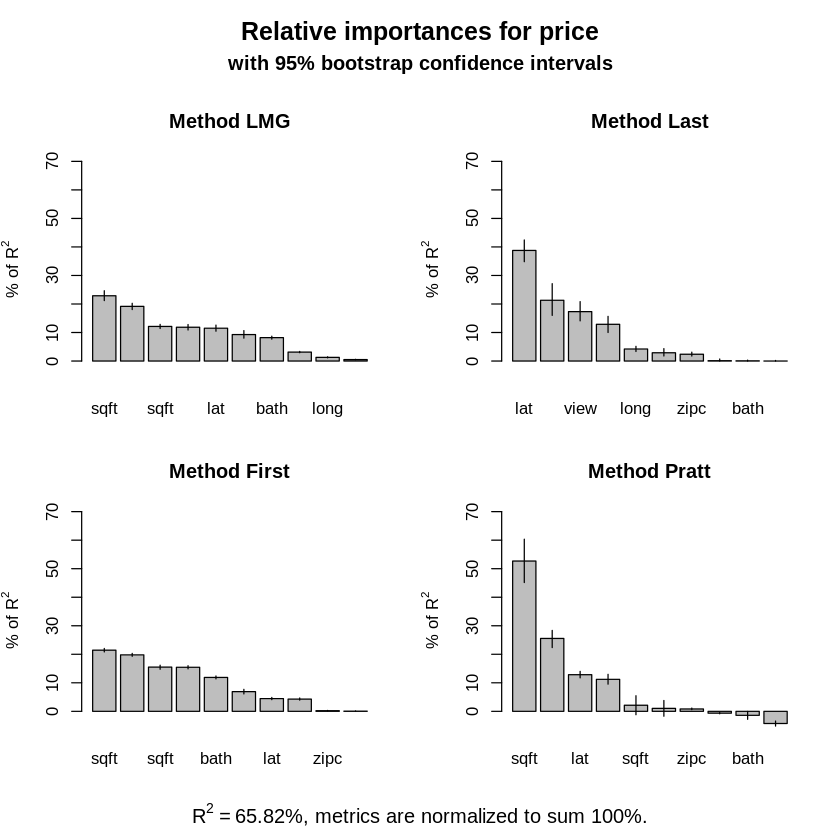

In [ ]:
# Calculate Relative Importance for Each Predictor
install.packages("relaimpo")
library(relaimpo)
calc.relimp(model1,type=c("lmg","last","first","pratt"),
   rela=TRUE)

# Bootstrap Measures of Relative Importance (1000 samples)
boot <- boot.relimp(model1, b = 1000, type = c("lmg",
  "last", "first", "pratt"), rank = TRUE,
  diff = TRUE, rela = TRUE)
booteval.relimp(boot) # print result
plot(booteval.relimp(boot,sort=TRUE)) # plot result

##**Decision Trees**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



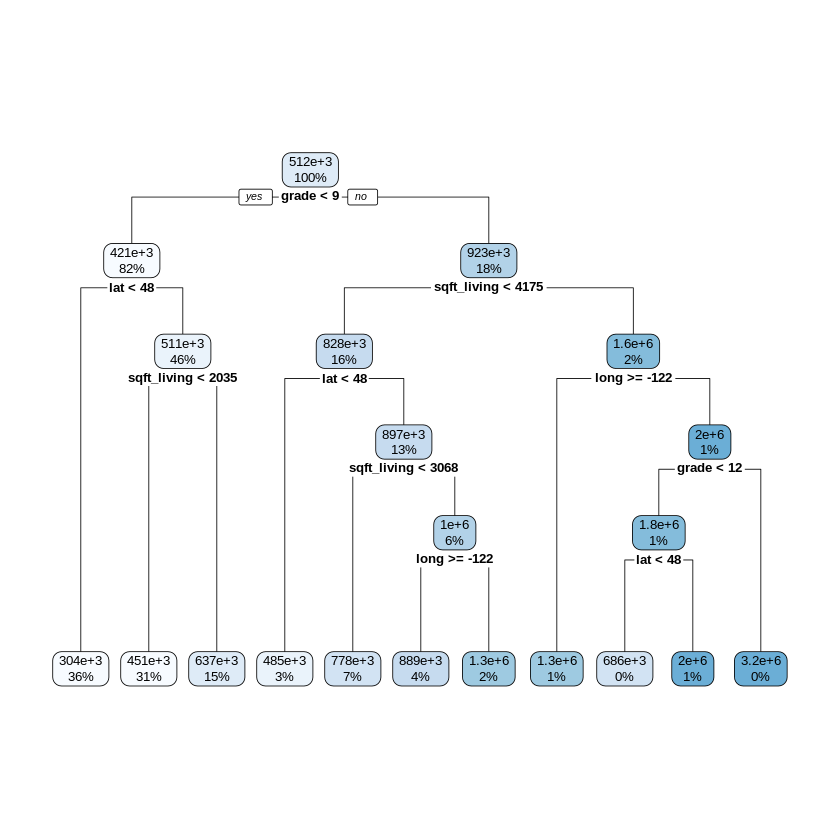

In [ ]:
# Decision trees installing the needed packages
install.packages("rpart")
library(rpart)

install.packages("MASS")
library(MASS)

install.packages("mlbench")
library(mlbench)

install.packages("rpart.plot")
library(rpart.plot)


# Grade, latitude, square foot of living, longitude were used to predict the price of a house.

In [ ]:
# Split the data
install.packages("caTools")
library(caTools)
set.seed(123)

split = sample.split(house$price, SplitRatio = 0.7)
train = subset(house, split==TRUE)
test = subset(house, split==FALSE)

# m <- rpart(price ~ zipcode + lat + grade+ sqft_living + sqft_living15 + sqft_above + bathrooms + long + bedrooms + view, 
#            data = house)
          
# rpart.plot(m)
# Plot the tree using prp command defined in rpart.plot package
# prp(m)

#In regression trees, we instead predict the number.That number here is the average of the median house prices in that bucket.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




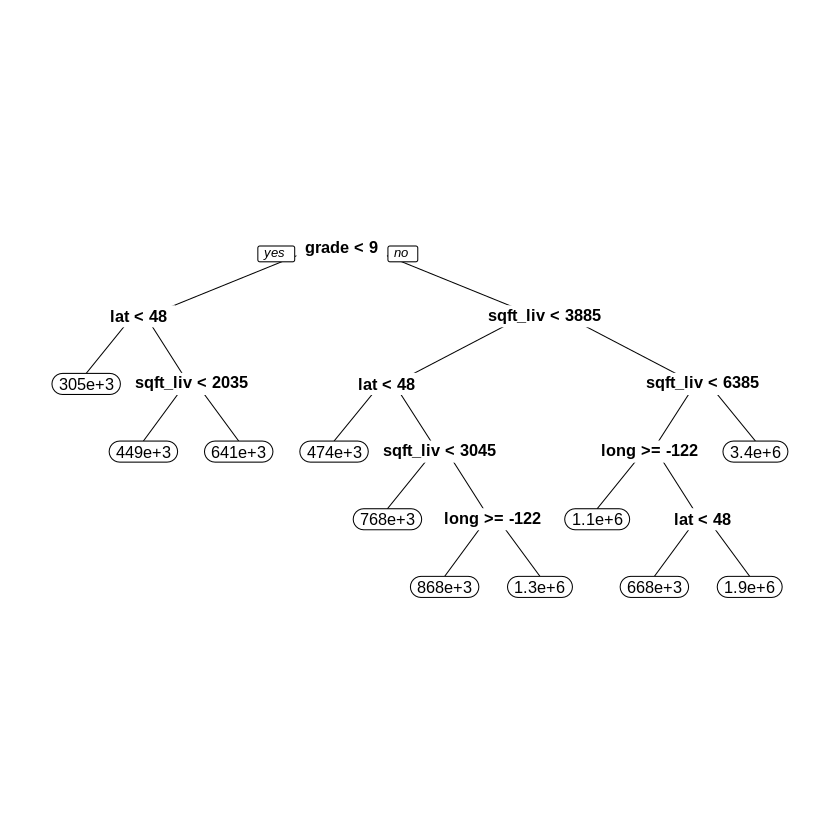

In [ ]:
# Create a CART model
tree = rpart(price ~ zipcode + lat + grade+ sqft_living + sqft_living15 + sqft_above + bathrooms + long + bedrooms + view, data = train)
prp(tree)

# Grade is the most important split.
# View, sqft_living 15, sqft above, bathrooms and bedrooms aren't really important. 

In [ ]:
head(test)

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0.4511149,-0.4376585,0.5179079,1.7734165,0.04875252,-0.8920925,-0.07435331,-0.2898588,-0.6144545,0.3323877,0.1365338,3.2691960,-0.3261194,-0.1883623,-1.2371647,0.3141865,0.5129668,0.3744472,0.3430542
-0.8413611,-0.4376585,-1.5033674,-0.9156946,0.04739583,-0.8920925,-0.07435331,-0.2898588,0.9615841,-0.5635068,-0.6547702,-0.6497385,-0.1798684,-0.1883623,-1.3092335,-1.5774087,-0.7002993,-1.0424989,0.3204517
-0.6052788,-0.4376585,-1.5033674,-0.8807711,0.04011900,-0.8920925,-0.07435331,-0.2898588,0.9615841,-1.4594012,-1.0828527,0.1801535,-0.5454960,-0.1883623,-0.3182874,-0.7665222,0.2868924,-0.9510830,0.3077942
0.8171919,0.6970036,0.5179079,0.2949875,0.27199076,0.9195432,-0.07435331,-0.2898588,0.9615841,1.2282821,0.6943382,-0.6497385,0.2588847,-0.1883623,-1.2371647,0.4469674,0.4677519,1.0905383,1.7775649
-0.6710232,0.6970036,0.5179079,0.2367816,-0.26871445,0.9195432,-0.07435331,-0.2898588,-0.6144545,-0.5635068,0.6294772,-0.6497385,1.1363910,-0.1883623,-1.3452679,-1.5525566,-0.3310444,0.3912068,-0.9733202
-0.9190591,-0.4376585,-1.5033674,-1.2067239,0.18898560,-0.8920925,-0.07435331,-0.2898588,0.9615841,-0.5635068,-0.9790751,-0.6497385,-0.2164312,-0.1883623,-0.6065626,-1.3800125,0.7767203,-1.4538703,1.4611287


In [ ]:
# Geeting the sum of squares error, to explain the efficiency of the trees
tree.pred = predict(tree, newdata=test)
tree.sse = sum((tree.pred - test$price)^2)
tree.sse

# The sse is 174065376850313, therefore decision trees will bot be the best model to predict the price of the house.

[1] 1.740654e+14

In [ ]:
# Calculating the SST
SST <- sum((tree.pred - mean(tree.pred))^2)


In [ ]:
#Calculating the R2
r_square <- 1 - tree.sse/SST
r_square

[1] 0.4917529

In [ ]:
# To come back to later
# y_test <- test$price

# y_predicted = predict(tree,X);
# RMSE = sqrt(nanmean((y_predicted-y).^2))
# RMSE0 = nanstd(y-nanmean(y));
# r_sq = 1 - (RMSE/RMSE0)

In [ ]:
summary(tree)

Call:
rpart(formula = price ~ zipcode + lat + grade + sqft_living + 
    sqft_living15 + sqft_above + bathrooms + long + bedrooms + 
    view, data = train)
  n= 11374 

           CP nsplit rel error    xerror       xstd
1  0.32477835      0 1.0000000 1.0001132 0.05664483
2  0.11156561      1 0.6752216 0.6755454 0.04554786
3  0.07489795      2 0.5636560 0.5846394 0.03675716
4  0.04191453      3 0.4887581 0.5105618 0.03661467
5  0.03217785      4 0.4468436 0.5010606 0.03629512
6  0.02919497      5 0.4146657 0.4392017 0.03262189
7  0.02917963      6 0.3854707 0.4297991 0.03248702
8  0.02041974      7 0.3562911 0.4098588 0.03224638
9  0.01507811      8 0.3358714 0.3575858 0.02055926
10 0.01000000     10 0.3057152 0.3283047 0.01969588

Variable importance
        grade   sqft_living    sqft_above sqft_living15           lat 
           25            22            16            13             9 
    bathrooms          long       zipcode          view      bedrooms 
            7           

Grade, latitude, square foot of living, longitude were used to predict the price of a house were used in creating the decision tree. The sse is 174065376850313, therefore decision trees will bot be the best model to predict the price of the house and an R2 of 0.49.

##**Random forest**

In [ ]:
#Scaling the dataset
scaled_house = scale(house)

In [ ]:
#Checking the head of the scaled data
head(scaled_house)

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
-0.865567012,-0.4376585,-1.5033674,-0.9971828,-0.20692309,-0.8920925,-0.07435331,-0.2898588,-0.6144545,-0.5635068,-0.74557558,-0.6497385,-0.6917471,-0.1883623,1.84377684,-0.3213156,-0.3310444,-0.9510830,-0.64392524
0.079061091,-0.4376585,0.1810287,0.6209403,-0.10874760,0.9195432,-0.07435331,-0.2898588,-0.6144545,-0.5635068,0.53867183,0.2723637,-0.8379981,5.2960153,0.88886514,1.1683866,-0.7982648,-0.4178237,-0.04450472
-0.990780291,-1.5723205,-1.5033674,-1.4744709,0.06133280,-0.8920925,-0.07435331,-0.2898588,-0.6144545,-1.4594012,-1.27743562,-0.6497385,-1.4961278,-0.1883623,-0.85880345,1.2883864,-0.1501849,1.1514822,0.08297385
-0.004613654,-0.4376585,-0.1558505,-0.4151241,-0.05706980,-0.8920925,-0.07435331,-0.2898588,-0.6144545,0.3323877,-0.09696578,-0.6497385,0.4782613,-0.1883623,-0.03001216,0.4285059,1.2665482,-0.2502280,-0.08549074
-0.759180550,-0.4376585,0.1810287,-0.3743800,-0.13483318,0.9195432,-0.07435331,-0.2898588,-0.6144545,-0.5635068,-0.05156309,-0.6497385,0.7707634,-0.1883623,-1.30923349,-1.7520830,-0.8585514,0.4171080,-0.29162631
-0.656529569,-0.4376585,-0.8296089,-1.1368769,0.04351074,-0.8920925,-0.07435331,-0.2898588,-0.6144545,-0.5635068,-0.90124193,-0.6497385,-0.3992450,-0.1883623,2.20412087,-1.0434449,-0.7681216,-0.4787676,0.57992932


In [ ]:
#Splitting the data into traiming and test sets
set.seed(1738) # Set a random seed so that same sample can be reproduced in future runs

sample = sample.int(n = nrow(scaled_house), size = floor(.8*nrow(scaled_house)), replace = F)
trainrf = scaled_house[sample, ] #just the samples
testrf  = scaled_house[-sample, ] #everything but the samples

In [ ]:
# Checking if hte train and test sets add up to the dataset
nrow(trainrf) + nrow(testrf) == nrow(scaled_house)

[1] TRUE

In [ ]:
head(trainrf)

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0.7962732,-0.4376585,1.1916663,0.690787351,0.070953011,-0.89209246,-0.07435331,-0.2898588,0.9615841,1.2282821,1.1353928,-0.6497385,0.478261297,-0.1883623,-1.25518189,-0.05930414,0.4300728,1.0600663,0.8041470
0.1149217,-0.4376585,-0.4927297,-0.694512289,-0.002986946,-0.89209246,-0.07435331,-0.2898588,0.9615841,-0.5635068,-0.4082985,-0.6497385,-0.618621531,-0.1883623,-1.21914748,0.31489656,0.7164337,-0.9510830,0.2993559
0.6408772,-0.4376585,0.5179079,0.003958118,0.063367844,-0.89209246,-0.07435331,-0.2898588,0.9615841,0.3323877,-0.4342429,0.7795200,0.002945405,-0.1883623,-1.27319909,0.57548793,0.3019640,0.4506271,0.7016819
2.0274873,0.6970036,0.5179079,1.680287094,0.194782397,0.01372539,-0.07435331,-0.2898588,0.9615841,3.0200710,2.2380295,-0.6497385,0.368573015,-0.1883623,-1.27319909,0.59607962,0.3170356,3.0407436,2.7329008
-0.3183939,0.6970036,0.5179079,0.679146178,0.021803598,0.91954324,-0.07435331,-0.2898588,-0.6144545,1.2282821,1.1224207,-0.6497385,0.478261297,-0.1883623,-0.31828739,-0.84107827,0.4602161,0.9381785,-0.1065865
0.3241086,-0.4376585,-0.4927297,0.434681536,1.617586978,-0.89209246,-0.07435331,-0.2898588,-0.6144545,0.3323877,0.8500045,-0.6497385,0.222321971,5.3235611,-0.06604656,1.48152226,0.3547147,0.2220874,2.7705717


In [ ]:
head(testrf)

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0.4511149,-0.4376585,0.5179079,1.7734165,0.04875252,-0.8920925,-0.07435331,-0.2898588,-0.6144545,0.3323877,0.1365338,3.2691960,-0.3261194,-0.1883623,-1.2371647,0.3141865,0.5129668,0.3744472,0.3430542
-0.8413611,-0.4376585,-1.5033674,-0.9156946,0.04739583,-0.8920925,-0.07435331,-0.2898588,0.9615841,-0.5635068,-0.6547702,-0.6497385,-0.1798684,-0.1883623,-1.3092335,-1.5774087,-0.7002993,-1.0424989,0.3204517
-0.6052788,-0.4376585,-1.5033674,-0.8807711,0.04011900,-0.8920925,-0.07435331,-0.2898588,0.9615841,-1.4594012,-1.0828527,0.1801535,-0.5454960,-0.1883623,-0.3182874,-0.7665222,0.2868924,-0.9510830,0.3077942
0.8171919,0.6970036,0.5179079,0.2949875,0.27199076,0.9195432,-0.07435331,-0.2898588,0.9615841,1.2282821,0.6943382,-0.6497385,0.2588847,-0.1883623,-1.2371647,0.4469674,0.4677519,1.0905383,1.7775649
-0.6710232,0.6970036,0.5179079,0.2367816,-0.26871445,0.9195432,-0.07435331,-0.2898588,-0.6144545,-0.5635068,0.6294772,-0.6497385,1.1363910,-0.1883623,-1.3452679,-1.5525566,-0.3310444,0.3912068,-0.9733202
-0.9190591,-0.4376585,-1.5033674,-1.2067239,0.18898560,-0.8920925,-0.07435331,-0.2898588,0.9615841,-0.5635068,-0.9790751,-0.6497385,-0.2164312,-0.1883623,-0.6065626,-1.3800125,0.7767203,-1.4538703,1.4611287


In [ ]:
# Installing the packages we need.
install.packages("randomForest")
library('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
?randomForest

In [ ]:
names(trainrf)

NULL

In [ ]:
# Setting the seed
set.seed(1738)

train_y = trainrf[,'price']
train_x = trainrf[, names(trainrf) !='price']

head(train_y)
head(train_x)

[1]  0.7962732  0.1149217  0.6408772  2.0274873 -0.3183939  0.3241086

[1,]
[2,]
[3,]
[4,]
[5,]
[6,]

In [ ]:
#some people like weird r format like this... I find it causes headaches
rf_model = randomForest(price~. , data = trainrf, ntree =500, importance = TRUE)
#rf_model = randomForest(train_x, y = train_y , ntree = 500, importance = TRUE)

In [ ]:
names(rf_model) #these are all the different things you can call from the model.

[1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"

In [ ]:
important <- as.data.frame(rf_model$importance)
#important

important[order(important$`%IncMSE`), ]
#In order of importance, latitude, square foot ot the living, grade, longitude and the year built are important in predicting the price of a house.

,%IncMSE,IncNodePurity
,<dbl>,<dbl>
yr_renovated,0.00118132,52.28623
bedrooms,0.00684341,66.57604
condition,0.01078917,74.27420
sqft_basement,0.01114440,286.44556
waterfront,0.01216654,187.24063
floors,0.01389295,43.10360
sqft_lot,0.01437724,173.44068
sqft_lot15,0.01518517,192.17006
view,0.01832867,302.57537


In [ ]:
oob_prediction = predict(rf_model) #leaving out a data source forces OOB predictions

In [ ]:
#Getting the RMSE 
train_mse = mean(as.numeric((oob_prediction - train_y)^2))
oob_rmse = sqrt(train_mse)
oob_rmse



[1] 0.361356

In [ ]:
library(modelr)

ERROR: ignored

In [ ]:
R2 = rsquare(rf_model, data = testrf)
R2
summary(rf_model)

[1] 0.8793998

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted       12512  -none- numeric  
mse               500  -none- numeric  
rsq               500  -none- numeric  
oob.times       12512  -none- numeric  
importance         36  -none- numeric  
importanceSD       18  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             11  -none- list     
coefs               0  -none- NULL     
y               12512  -none- numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [ ]:
#To come back later
test_y = testrf[,'price']
test_x = testrf[c(2:19)]

#y_pred = predict(rf_model , test_x)
# test_mse = mean(((y_pred - test_y)^2))
# test_rmse = sqrt(test_mse)
# test_rmse


In order of importance, latitude, square foot ot the living, grade, longitude and the year built are important in predicting the price of a house.

The RMSE is 0.3589 therefore the model is performing fairly well and R2 of 0.87

##**KNN**

In [ ]:
library(dplyr)
install.packages("import")
library(import)
`%>%`<-import::from(dplyr,'%>%')

# features <-  select (house,zipcode, lat, grade, sqft_living, sqft_living15, sqft_above, bathrooms, long, bedrooms, view, price)
# head(features)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [ ]:
#Subsetting the needed columnms

features <-  subset (house, select= c(zipcode, lat, grade, sqft_living, sqft_living15, sqft_above, bathrooms, long, bedrooms, view, price))
head(features)

zipcode,lat,grade,sqft_living,sqft_living15,sqft_above,bathrooms,long,bedrooms,view,price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
98178,47.5112,7,1180,1340,1180,1.00,-122.257,3,0,221900
98125,47.7210,7,2570,1690,2170,2.25,-122.319,3,0,538000
98028,47.7379,6,770,2720,770,1.00,-122.233,2,0,180000
98074,47.6168,8,1680,1800,1680,2.00,-122.045,3,0,510000
98003,47.3097,7,1715,2238,1715,2.25,-122.327,3,0,257500
98198,47.4095,7,1060,1650,1060,1.50,-122.315,3,0,291850


In [ ]:
library(dplyr)    #For Data manipulation 
library(class)    #For KNN Regression
library(ggplot2)  #For making plots

In [ ]:
# Creating Training and Test data subsets
# We will now divide the dataset into two subsets. Our knn regression model would then be trained using subset “features” 
# and tested using “features”. 
# Seperating Class Attribute from rest of the dataset
class <- data.frame("cost" = features$price)
names(class)= "cost"

# Required to reproduce the results
set.seed(999) 
rnum<- sample(rep(1:15641))

# Randomizing "airquality" dataset
feat<- features[rnum,] 

# Applying same randomization on "class" attribute
costs <- as.data.frame(class[rnum,]) 

# Splitting into training and testing set
advert.train<- features[1:10000,]
advert.train.target<- class[1:10000,]
advert.test<- features[10001:15641,]
advert.test.target<- class[10001:15641,]

# Applying k-NN classification algorithm.
# No. of neighbours are generally square root of total number of instances
neigh<- round(sqrt(nrow(features)))+1 
neigh
# Applying the knn algorithm
model3 <- knn(train = advert.train,  test = advert.test, cl=advert.train.target, k=neigh) 

# Visualizing classification results

table(factor(advert.test.target))
tb3 <-table(advert.test.target, model3)

# Calculating the Accuracy
mean(advert.test.target== model3)
# Vector of mean of true/1 and false70
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb3)

[1] 126


  78000   81000   83000   85000   90000   95000   1e+05  105000  109500  110000 
      1       1       1       1       2       1       1       2       1       2 
 115000  120750  124000  124740  125000  126500  128000  129000  129888  130000 
      5       1       1       1       1       1       1       1       1       3 
 135000  135900  137000  139000  139950  140000  142500  145000  146000  146300 
      2       1       1       1       1       3       1       1       1       1 
 147000  147400  147500  148900  150000  152000  152275  152500  153000  153500 
      2       1       1       1       5       1       1       2       1       1 
 154000  155000  156000  157000  157500  158000  159000  159100  159995  160000 
      1       3       1       1       2       1       2       1       1       5 
 160797  162500  162950  163000  163500  163800  165000  168000  168500  169000 
      1       1       1       1       1       1       6       2       2       2 
 169950  170000  170500  17

[1] 0.3689062

[1] 0

In [ ]:
install.packages("caret")
library(caret)
R2_KNN = R2(tb3, advert.test )


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




ERROR: ignored

In [ ]:

R2_KNN


ERROR: ignored

KNN model has an accuracy of 0.3689 with 126 neighbours used.

##**SVM**

In [ ]:
#advert$Clicked.on.Ad =as.factor(advert$Clicked.on.Ad)
# install.packages("caret")
# library(caret)

install.packages("kernlab")
library(kernlab)
intrain <- createDataPartition(y = features$price, p= 0.8, list = FALSE)
training <- features[intrain,]
testing <- features[-intrain,]

# We check the dimensions of out training dataframe and testing dataframe
dim(training); 
dim(testing);

trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(price ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

# We can then check the reult of our train() model as shown below
svm_Linear

# We can use the predict() method for predicting results as shown below. 
# We pass 2 arguements, our trained model and our testing data frame.
test_pred <- predict(svm_Linear, newdata = testing)
test_pred



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:scales’:

    alpha


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




[1] 12514    11

[1] 3127   11

Support Vector Machines with Linear Kernel 

12514 samples
   10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 11263, 11263, 11263, 11262, 11261, 11262, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  207090.2  0.6507456  115033.2

Tuning parameter 'C' was held constant at a value of 1

1           2           3           4           5           6 
 474852.388  488797.013  586316.700  552955.496  338106.164  298531.980 
          7           8           9          10          11          12 
 273533.880  589817.967  263589.451  472404.048  273957.939  173512.134 
         13          14          15          16          17          18 
 467898.745  300512.994  669798.937  395195.806  477991.829  225646.452 
         19          20          21          22          23          24 
 682214.626  288538.095  371107.017  330217.714  189283.378  474164.449 
         25          26          27          28          29          30 
 604515.390  466519.939  511856.797  729874.881  278209.430  539768.648 
         31          32          33          34          35          36 
 270091.102  320119.867  513407.874  467053.127  881912.598  188746.643 
         37          38          39          40          41          42 
 850180.881  226948.956  461345.840  504326.668  546579.358  641973.891 
         43          44          45          46          47          48 
 200450.759  246462.422  651572.063  412340.723  681001.817  322892.331 
         49          50          51          52          53          54 
 557588.997  404184.117  374651.933  543456.881  793631.200  593337.571 
         55          56          57          58          59          60 
 553610.445  515332.327  721811.623  479641.327  490815.387  494216.652 
         61          62          63          64          65          66 
 394761.709  602115.372  524520.334  479104.151  198629.852  854709.331 
         67          68          69          70          71          72 
 535397.627  160711.136  482384.085  973037.819  740489.128  584208.893 
         73          74          75          76          77          78 
 681809.717  622309.846  190539.184  105518.875  223529.359  303734.049 
         79          80          81          82          83          84 
 470661.077  143772.360  289602.995  325906.043  612326.588  211122.437 
         85          86          87          88          89          90 
 269939.746  245069.553  182651.156  649870.310  133301.739  445732.265 
         91          92          93          94          95          96 
 199715.403  391865.514  476844.511  302438.228  661932.872  672657.799 
         97          98          99         100         101         102 
 266786.119  548325.419  289862.300  898051.998  252067.524  248484.636 
        103         104         105         106         107         108 
 607277.084  299593.142  444143.343  413899.696  926786.271  193736.757 
        109         110         111         112         113         114 
 696883.662  206272.398  351337.642 1211005.920  403819.248  397105.004 
        115         116         117         118         119         120 
 303810.098  339692.216  228959.412  282047.650  188183.551  382571.194 
        121         122         123         124         125         126 
 840384.032  309251.654  450615.888  492509.475  410345.288  396862.092 
        127         128         129         130         131         132 
 333450.562  223410.144  682234.066  397738.727  525600.554  526119.024 
        133         134         135         136         137         138 
 320378.442  425405.394  451592.184  369667.638  486819.820  674694.839 
        139         140         141         142         143         144 
 430470.574  255513.538  333180.877  973296.043  338007.115  601936.832 
        145         146         147         148         149         150 
 410353.695  811001.865  501226.089   66669.926 1187614.739  347584.494 
        151         152         153         154         155         156 
 426128.012  612069.967  191014.534  774271.145  376776.470  485294.316 
        157         158         159         160         161         162 
 643133.698  486003.616  184657.279  596587.593  560952.837  687434.869 
        163         164         165         166         167         

Warning message:
“Unknown or uninitialised column: `Clicked.on.Ad`.”


ERROR: ignored

The SVM model gave us an R2 of 0.6507456 with the C parameter held constant at value of 1 with 10 cross validations repeated 3 times.

##**Neural Networks**

In [ ]:
#Installing and loading the packages needed for neural networks.
library(tidyverse)

install.packages("neuralnet")
library(neuralnet)

install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



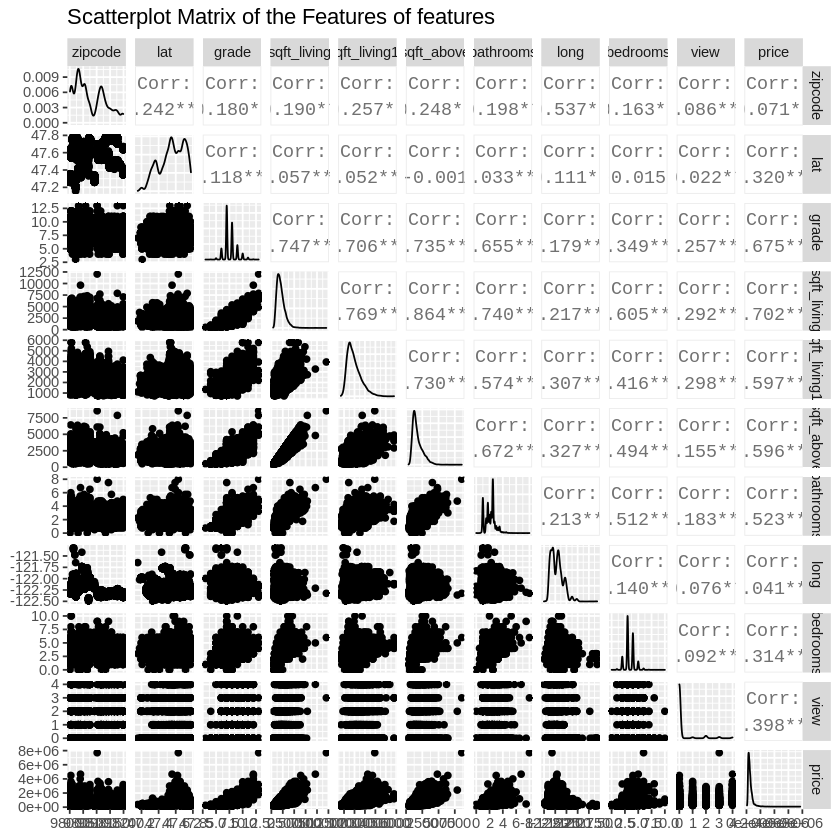

In [ ]:
#Plotting the pair plots of the selected features.
ggpairs(features, title = "Scatterplot Matrix of the Features of features")

In [ ]:
# Scale the Data
scale01 <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

Feat_Data <- features %>%
  mutate_all(scale01)

# Split into test and train sets
set.seed(12345)
Feat_Data_Train <- sample_frac(tbl = Feat_Data, replace = FALSE, size = 0.80)
Feat_Data_Test <- anti_join(Feat_Data, Feat_Data_Train)

Joining, by = c("zipcode", "lat", "grade", "sqft_living", "sqft_living15", "sqft_above", "bathrooms", "long", "bedrooms", "view", "price")



In [ ]:
#NEURAL NETWORK 1
set.seed(12321)
Feat_NN1 <- neuralnet(price ~ ., data = Feat_Data_Train)

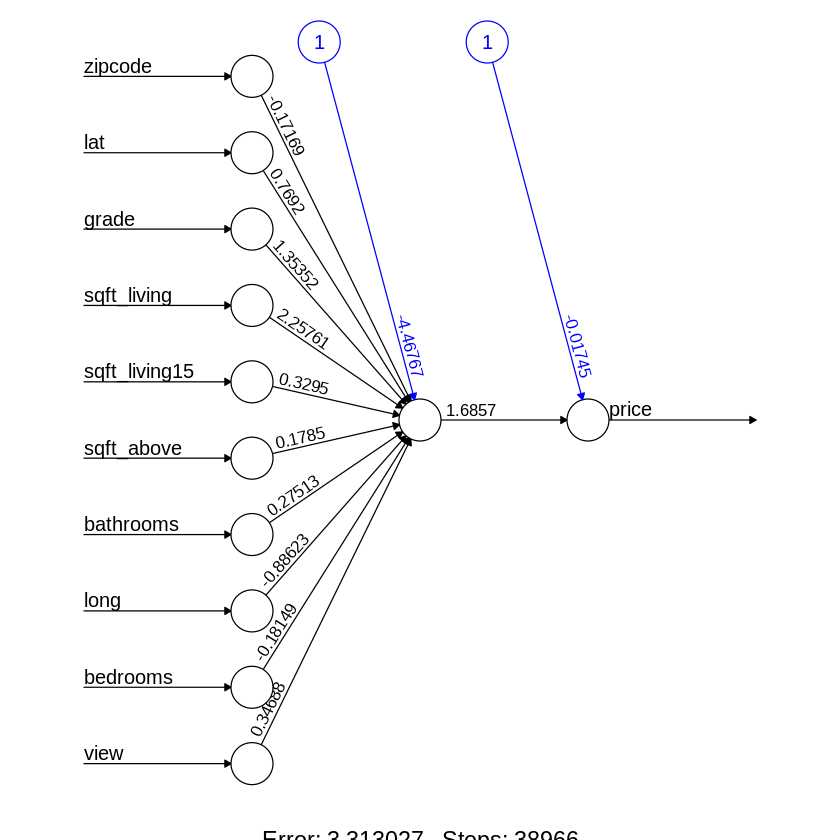

In [ ]:
plot(Feat_NN1, rep = 'best')

In [ ]:
Test_NN1_Output <- compute(Feat_NN1, Feat_Data_Test[, 1:10])$net.result
NN1_Test_SSE <- sum((Test_NN1_Output - Feat_Data_Test[, 11])^2)/2
NN1_Test_SSE

[1] 0.8680047

In [ ]:
# to calculate SSE, SST and R^2


# NOTE: we're using average price from training dataset as our baseline for calculating SST for test dataset.
# If we had to calculate SST for training dataset, we still will be using average price of training dataset
NN1_Test_SST = sum((Test_NN1_Output - mean(Feat_Data$price))^2)
NN1_Test_SST

NN1_r_square <- 1 - NN1_Test_SSE/NN1_Test_SST
NN1_r_square

[1] 4.493965

[1] 0.806851

In [ ]:
#NEURAL NETWORK 2
# 2-Hidden Layers, Layer-1 4-neurons, Layer-2, 1-neuron, logistic activation
# function
set.seed(12321)
Feat_NN2 <- neuralnet(price ~ ., 
                       data = Feat_Data_Train, 
                       hidden = c(4, 1), 
                       act.fct = "logistic")

## Training Error
NN2_Train_SSE <- sum((Feat_NN2$net.result - Feat_Data_Train[, 11])^2)/2

## Test Error
Test_NN2_Output <- compute(Feat_NN2, Feat_Data_Test[, 1:10])$net.result
NN2_Test_SSE <- sum((Test_NN2_Output - Feat_Data_Test[, 11])^2)/2

[1] 0.5858425

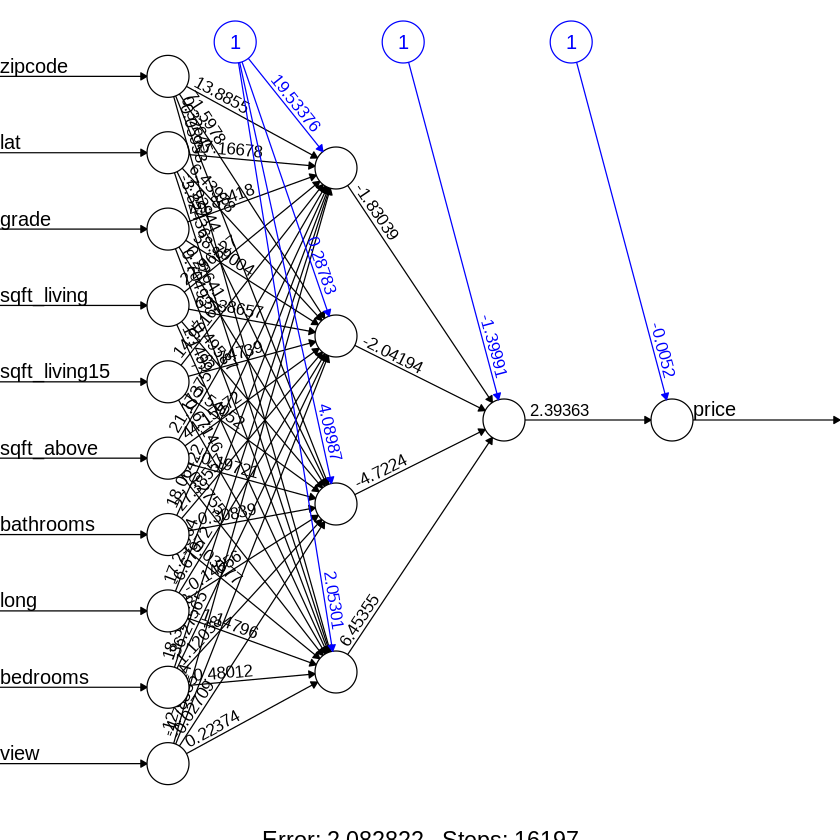

In [ ]:
plot(Feat_NN2, rep = 'best')
NN2_Test_SSE

In [ ]:
NN2_Test_SST = sum((Test_NN2_Output - mean(Feat_Data$price))^2)
NN2_Test_SST

NN2_r_square <- 1 - NN2_Test_SSE/NN2_Test_SST
NN2_r_square

[1] 5.025795

[1] 0.8834329

The first neural network has given us an R2 of 0.806 and the second neural network has an R2 of 0.8834.

In [ ]:
#NEURAL NETWORK 3
# 2-Hidden Layers, Layer-1 4-neurons, Layer-2, 1-neuron, tanh activation
# function
set.seed(12321)
Feat_NN3 <- neuralnet(price ~ ., 
                       data = Feat_Data_Train, 
                       hidden = c(4, 1), 
                       act.fct = "tanh")

## Training Error
NN3_Train_SSE <- sum((Feat_NN3$net.result - Feat_Data_Train[, 11])^2)/2

## Test Error
Test_NN3_Output <- compute(Feat_NN3, Feat_Data_Test[, 1:10])$net.result
NN3_Test_SSE <- sum((Test_NN3_Output - Feat_Data_Test[, 11])^2)/2

Warning message:
“Algorithm did not converge in 1 of 1 repetition(s) within the stepmax.”


ERROR: ignored

In [ ]:
plot(Feat_NN3, rep = 'best')
NN3_Test_SSE

In [ ]:
#NEURAL NETWORK 4
# 1-Hidden Layer, 1-neuron, tanh activation function
set.seed(12321)
Feat_NN4 <- neuralnet(price ~ ., 
                       data = Feat_Data_Train, 
                       act.fct = "tanh")

## Training Error
NN4_Train_SSE <- sum((Feat_NN4$net.result - Feat_Data_Train[, 11])^2)/2

## Test Error
Test_NN4_Output <- compute(Feat_NN4, Feat_Data_Test[, 1:10])$net.result
NN4_Test_SSE <- sum((Test_NN4_Output - Feat_Data_Test[, 11])^2)/2

Warning message:
“Algorithm did not converge in 1 of 1 repetition(s) within the stepmax.”


ERROR: ignored

In [ ]:
plot(Feat_NN4, rep = 'best')
NN4_Test_SSE

ERROR: ignored

Neural network 3 and 4 did not converge and thus could not be assessed.


## **Summary**
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

- Multiple linear regression: 0.6582 
- Decision trees: 0.49
- Random forest: 0.87
- SVM: 0.6507456
- Neural networks 1:0.806851016211724
- Neural network 2: 0.883432875963315
- KNN(accuracy): 0.3689

## **Recommendation and conclusion**
In order of importance use the following variables: latitude, square foot ot the living, grade, longitude and the year built are important in predicting the price of a house.



Neural network 2 and random forest are likely to be best models for predicting the and will need further hyperparameter tuning to increase the R2 metric to make the regression model.



